<a href="https://colab.research.google.com/github/Srujthkumar/devtraining-needit-kingston/blob/master/GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data and viewing some basic descriptives

In [2]:
#Aparna
#Set up and file reading
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

url_to_data = "https://raw.githubusercontent.com/AparnaNagarajan/data-science/master/train.csv"
house_pricing_data = pd.read_csv(url_to_data)

# Steve
# Please feel free to redo if you think of a better way.
bins = [0,250,500,750,1000,1250,1500]
bin_labels = ['0','250','500','750','1000','>1250']
house_pricing_data['GarageArea_Group'] = pd.cut(house_pricing_data.GarageArea, bins, right=False, labels = bin_labels)

bins = [0,1900,1925,1950,1975,2000,2025]
bin_labels = ['0','1900','1925','1950','1975','>2000']
house_pricing_data['YearBuilt_Group'] = pd.cut(house_pricing_data.YearBuilt, bins, right=False, labels = bin_labels)

bins = [0,1900,1925,1950,1975,2000,2025]
bin_labels = ['0','1900','1925','1950','1975','>2000']
house_pricing_data['GarageYrBlt_Group'] = pd.cut(house_pricing_data.GarageYrBlt, bins, right=False, labels = bin_labels)

# Steve
# Replace NaN with "Missing"
# Pivoting is more informative when we don't have NaN. For now, using "Missing"
house_pricing_data.GarageType.replace(np.nan, "Missing", regex=True, inplace=True)

house_pricing_data.info()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Id                 1460 non-null   int64   
 1   MSSubClass         1460 non-null   int64   
 2   MSZoning           1460 non-null   object  
 3   LotFrontage        1201 non-null   float64 
 4   LotArea            1460 non-null   int64   
 5   Street             1460 non-null   object  
 6   Alley              91 non-null     object  
 7   LotShape           1460 non-null   object  
 8   LandContour        1460 non-null   object  
 9   Utilities          1460 non-null   object  
 10  LotConfig          1460 non-null   object  
 11  LandSlope          1460 non-null   object  
 12  Neighborhood       1460 non-null   object  
 13  Condition1         1460 non-null   object  
 14  Condition2         1460 non-null   object  
 15  BldgType           1460 non-null   object  
 16  HouseS

# Which variables do we really need?

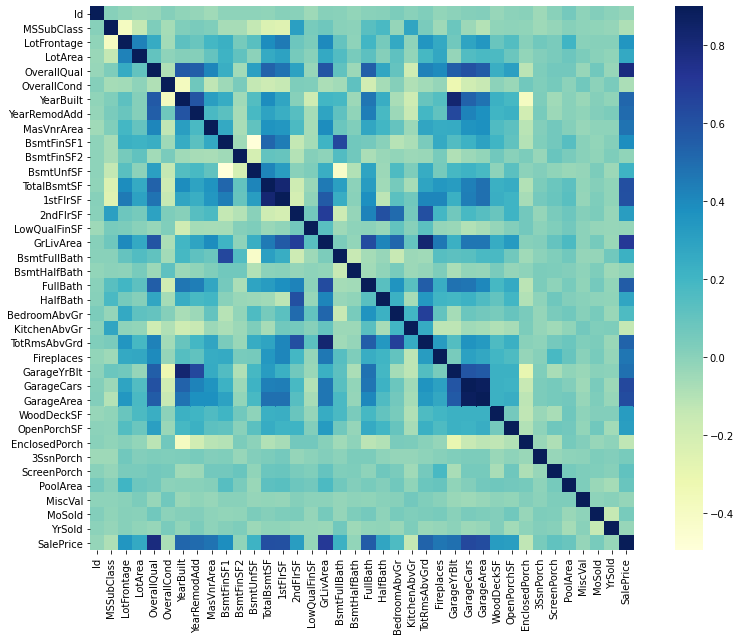

In [3]:
# Sirisha
# Tl;dr Summary
# Drop variables: 'GarageArea', 'GarageYrBuilt', 'GrLivArea', 'Street', 'Utilities'
# Transform to Binary/Nominal variables: 'MSZoning','YearRemodelAdd', 'LotShape', 'LandContour',
corrmat = house_pricing_data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=0.90, square=True, cmap="YlGnBu");

#Sirisha
# Observations
# Saleprice is strongly correlated to 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'
# '1stFlrSF' and 'TotalBsmtSF' have high degree of correlation. Similarly, 'GarageCars' and 'GarageArea'. There are good candidates to introduce 
# multicollinearity for the model. Suggestions indicated below. Please advise if you have other ideas
# Drop 'TotalBsmtSF', since that is not the primary parameter of a house compared to '1stFlrSF'. Alternative is to enginneer a new attribute which is the sum of both the areas
# Drop 'GarageArea', since the area of the Garage itself is a proxy to the numbers of the cars ('GarageCars') a garage can fit.
# Drop 'GarageYrBlt' from our analysis, since we already have 'Yearbuilt'
# 'TotRmsAbvGrd' and 'GrLivArea' are both talking about the same parameter and are directly proportionate. Would suggest using 'TotRmsAbvGrd' to avoid additional binning of Areas
# 'YearRemodelAdd' is the same as 'YearBuilt' for non-remodeled homes. Suggest to convert this to a binary variable to identify effect of remodeling and to avoid multicollinearity

# This graph is also going to help us fill missing varilables for predictor variables (Re: 'LotFrontage') 

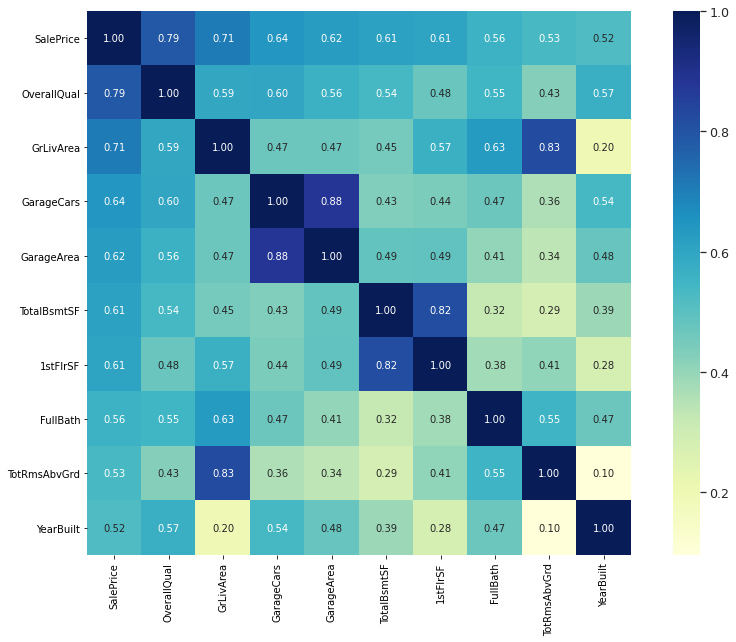

In [4]:
# Sirisha
#Deep dive on highly correlated quantitative variables. Using threshold as Top 10 highest correlated variables
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_pricing_data[cols].values.T)
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="YlGnBu")
plt.show()

# Observations: This graph is also going to help us fill missing varilables for predictor variables (Re: 'LotFrontage')

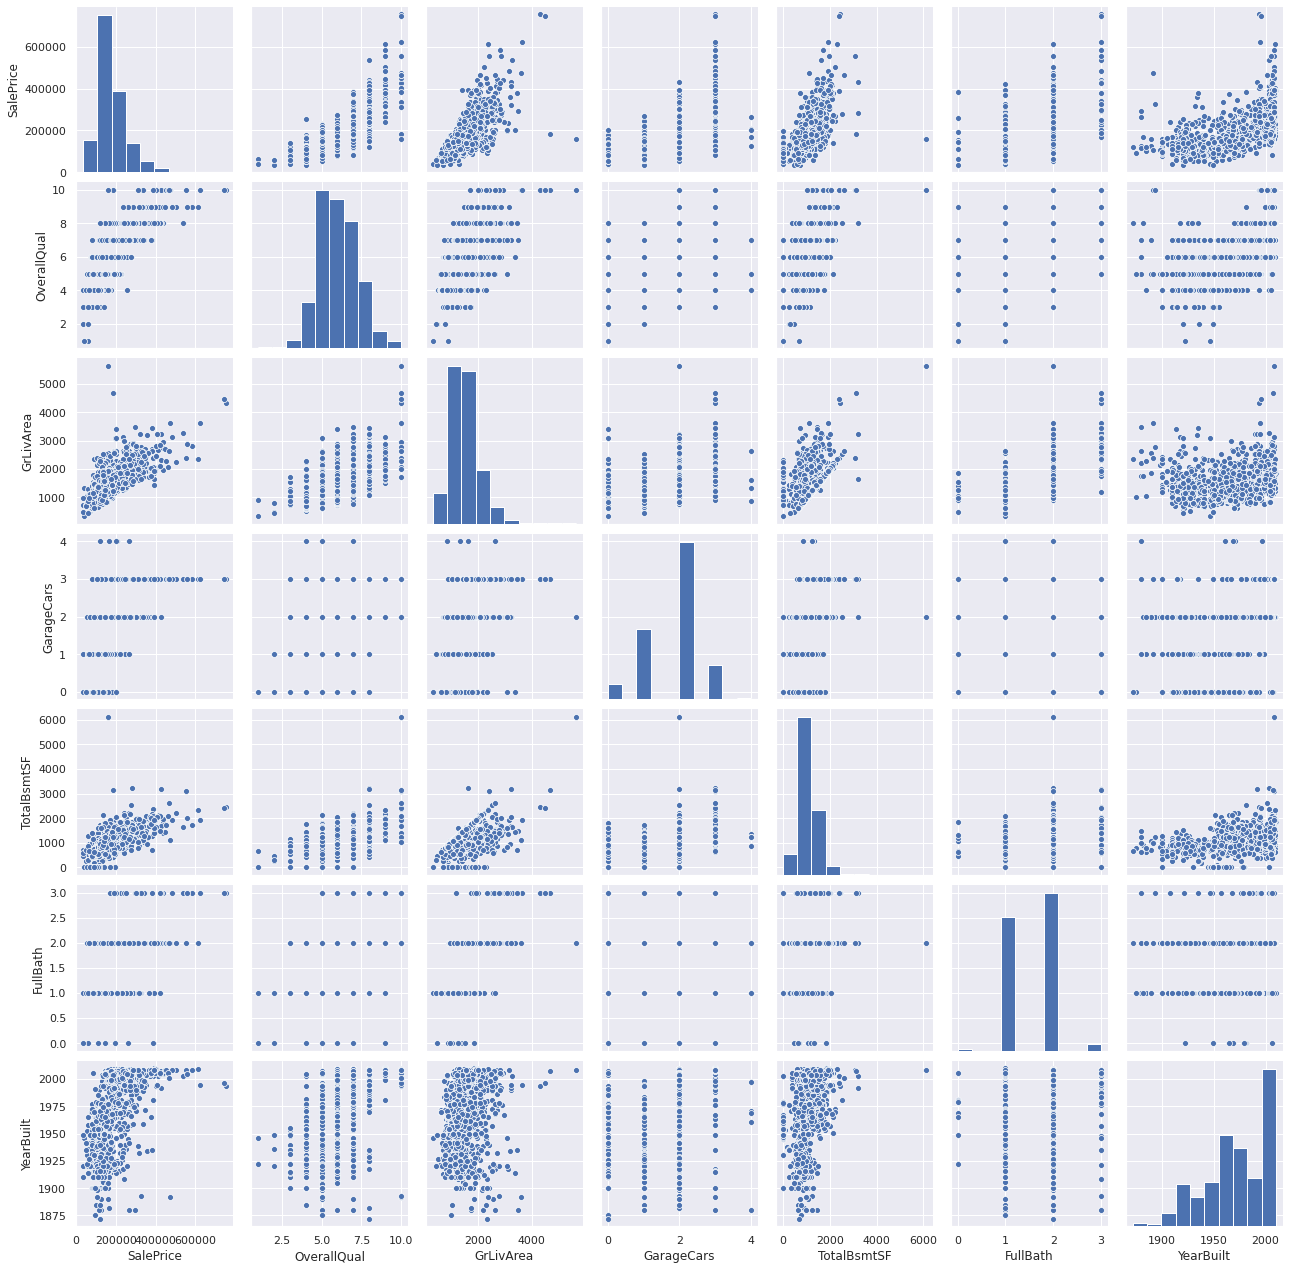

In [5]:
#Scatterplot to understand how variables are associated 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_pricing_data[cols], height = 2.5)
plt.show();
# Observations: Validates common understanding that 'Saleprice' is strongly correlated with GrLivArea. Similar pattern is with 'TotalBsmtSF'. Also important to see that house prices of recent years' constructions are significantly higher
# Middle Quartiles in 'OverallQual' doesn't seem to impact the 'SalePrice' as one would expect
# 'GrLivArea' and 'TotalBsmtSF'create a V in the scatter plot which indicate that in most cases the basement area is constarained by the Above ground living area. There are 2 outliers though.
# The general trend is newer homes seem to have comparitively higher Basement Square footage 


# Data Exploration - Univariate Analysis


In [6]:
#Yezhou Jiang
#house_pricing_data['Bedroom'].head(5)
house_pricing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageArea_Group,YearBuilt_Group,GarageYrBlt_Group
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,500,>2000,>2000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,250,1975,1975
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,500,>2000,>2000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,500,1900,1975
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,750,>2000,>2000


In [7]:
#Yezhou Jiang
#*******************************************************************#
#*********Step 1 Understand the target Variable - SalePrice*********#
#*******************************************************************#

  #Obeservation 1: All prices are fall in range [34900,755000] and no negative values, 
                   #so no noise data is detected.

  #Obeservation 2: Based on the histogram showing below, it can be noticed that the target variable 
                   #has a right tail distribution, we need to consider whether need to convert 
                   #right tail distribution to normal distribution for modeling benefits

  #Obeservation 3: Based on the boxplot showing below, it can be noticed that values more than 
                   #approximately 340000 are outliers

In [8]:
  #Obeservation 1: Quartile check and basic noise data check
house_pricing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


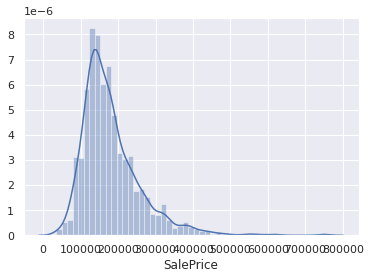

In [9]:
  #Obeservation 2: Skewness and Kurtosis check
sns.distplot(house_pricing_data['SalePrice'])
print('Skewness: %f'%house_pricing_data['SalePrice'].skew())
print('Kurtosis: %f'%house_pricing_data['SalePrice'].kurt())

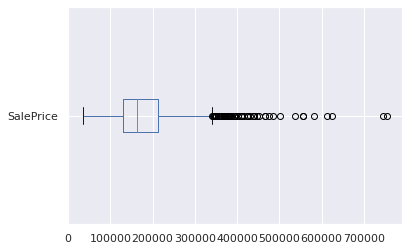

In [10]:
  #Obeservation 3: Outliers check
house_pricing_data.SalePrice.plot(kind="box", vert=False)

In [11]:
#*****************************************************************************************************************************#
#*********Step 2 Understand explanatory variables(predictor variables) - Numerical Variables or Categorical Variables*********#
#*****************************************************************************************************************************# 

  #Numerical Variables: LotFrontage, LotArea, YearBuilt, YearRemodAdd,MasVnrArea, BsmtFinSF1, BsmtFinSF2,BsmtUnfSF,
                        #TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageYrBlt, GarageArea, WoodDeckSF,
                        #OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
  
  #Categorical Variables: MSSubClass, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, 
                        #Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond,
                        #RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation
                        #BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir,
                        #Electrical, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, KitchenQual,
                        #TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars,
                        #GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

  #In total, there are 79 explanatory variables (excluding ID, and SalePrice). But it is too much work to understand each
    #of them, and also not all of these variables will be selected as model inputs. Hence, based on the correlation level 
    #between target variables and explanatory variables, we only need to understand a few of explanatory variables

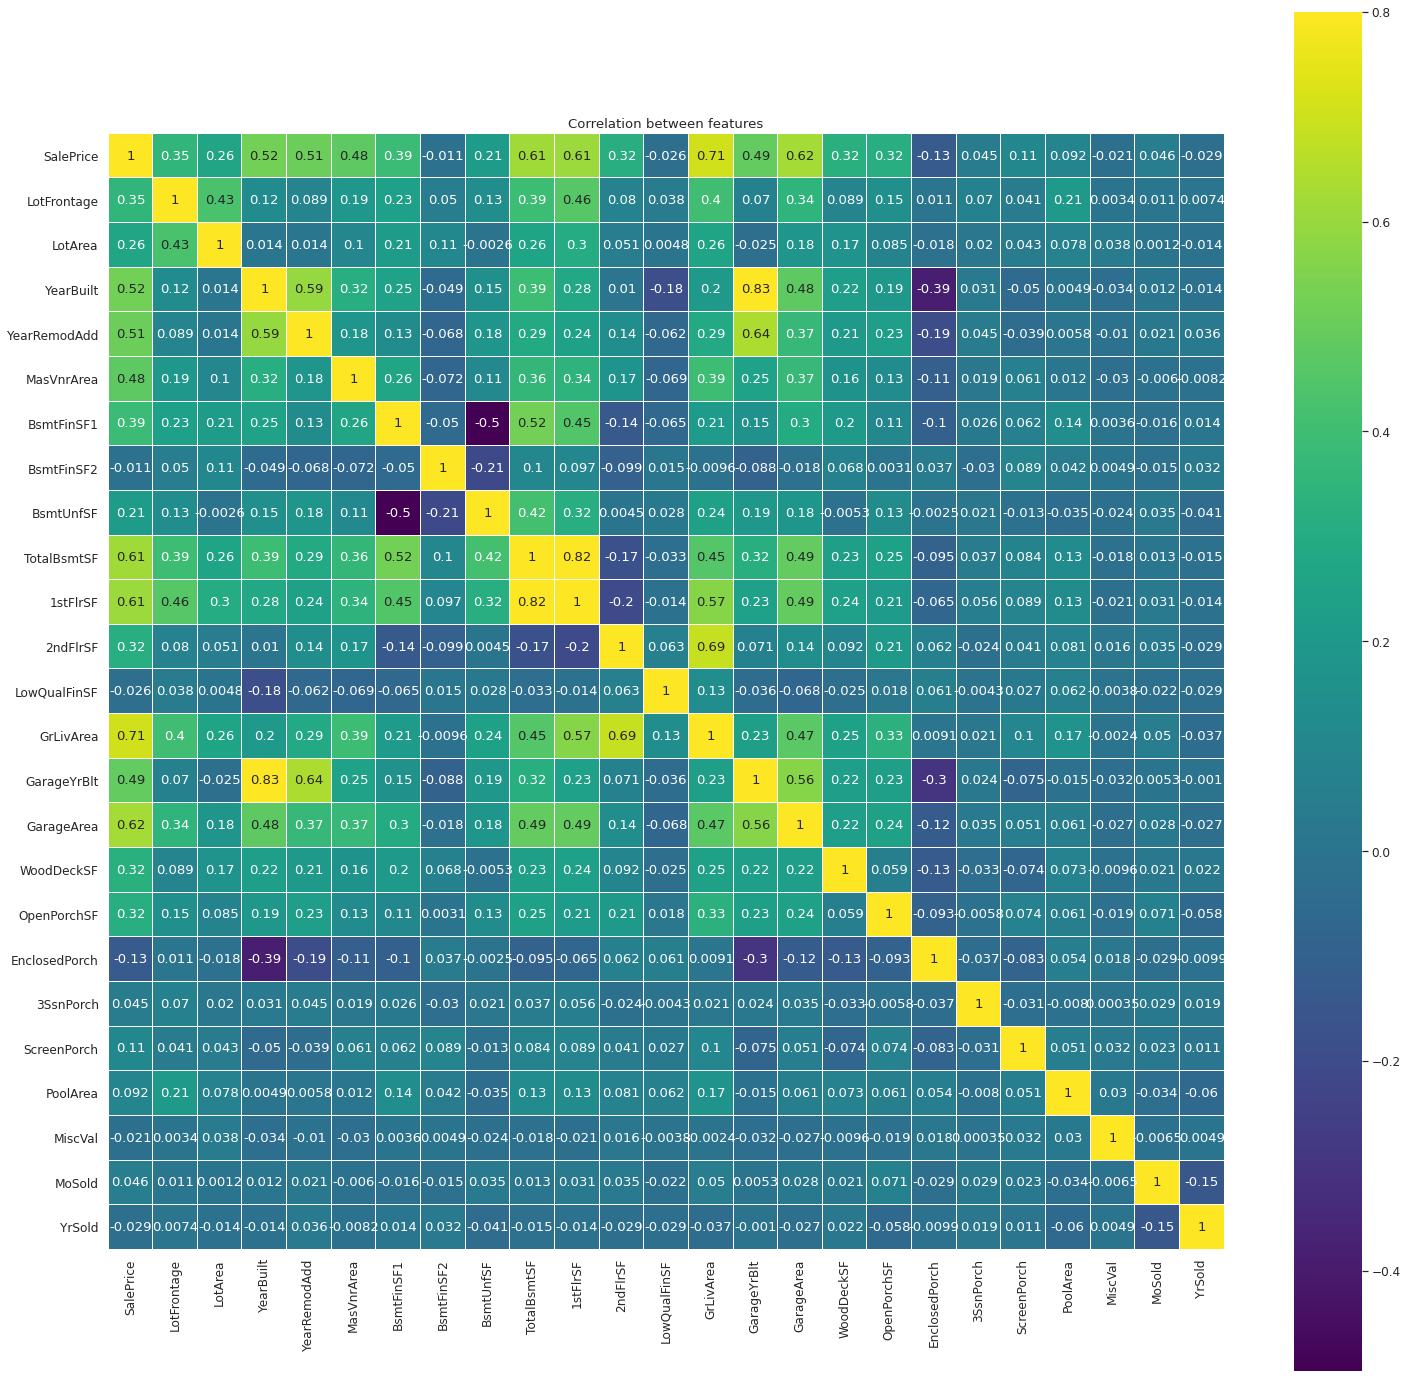

In [12]:
  #Correlation between numerical variables and target variable

  #Observation: Based on the correlation heat map showing below, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea,
    #have a strong correlation with a target variable - SalePrice. These variables worth further understanding as they have 
    #strong positive relationship with the target variable.

    #Correlation coefficient(R) interpretation: R in range [-1,1], when R < 0, then negative correlation,
                                                                  #when R > 0, then positive correlation. 
                                                                  #when R = 0, then no correlation
                                            #Here we are looking for positive correlation 
                                            # 0.00 < R < 0.199 Very Low Positive Correlation
                                            # 0.20 < R < 0.399 Low Positive Correlation
                                            # 0.40 < R < 0.599 Morderate Positive Correlation
                                            # 0.60 < R < 0.799 Storng Positive Correlation
                                            # 0.80 < R < 1 Very Strong Positive Correlation

corrMatrix = house_pricing_data[["SalePrice","LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd","MasVnrArea", "BsmtFinSF1"
                                , "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
                                 "GarageYrBlt", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                                 "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(25, 25))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

#**********Reminder for Yezhou Jiang: need to check multicollinearity for model inputs**********#

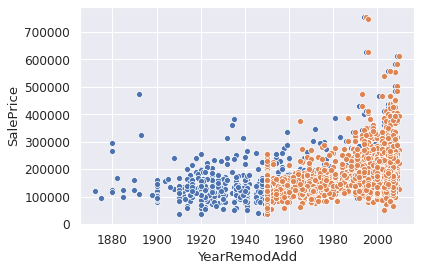

In [13]:
  #Correlation between numerical variables and target variable - YearBuilt & SalePrice
      #Obeservation: the newer the house, the higher price the house
sns.scatterplot(house_pricing_data.YearBuilt, house_pricing_data.SalePrice)
  #Correlation between numerical variables and target variable - YearRemodAdd & SalePrice
sns.scatterplot(house_pricing_data.YearRemodAdd, house_pricing_data.SalePrice)

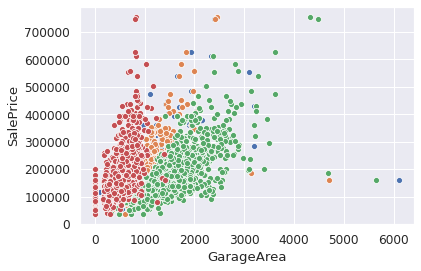

In [14]:
  #Correlation between numerical variables and target variable - TotalBsmtSF & SalePrice
sns.scatterplot(house_pricing_data.TotalBsmtSF, house_pricing_data.SalePrice)
  #Correlation between numerical variables and target variable - 1stFlrSF & SalePrice
sns.scatterplot(house_pricing_data['1stFlrSF'], house_pricing_data.SalePrice)
  #Correlation between numerical variables and target variable - GrLivArea & SalePrice
sns.scatterplot(house_pricing_data.GrLivArea, house_pricing_data.SalePrice)
  #Correlation between numerical variables and target variable - GarageArea & SalePrice
sns.scatterplot(house_pricing_data.GarageArea, house_pricing_data.SalePrice)


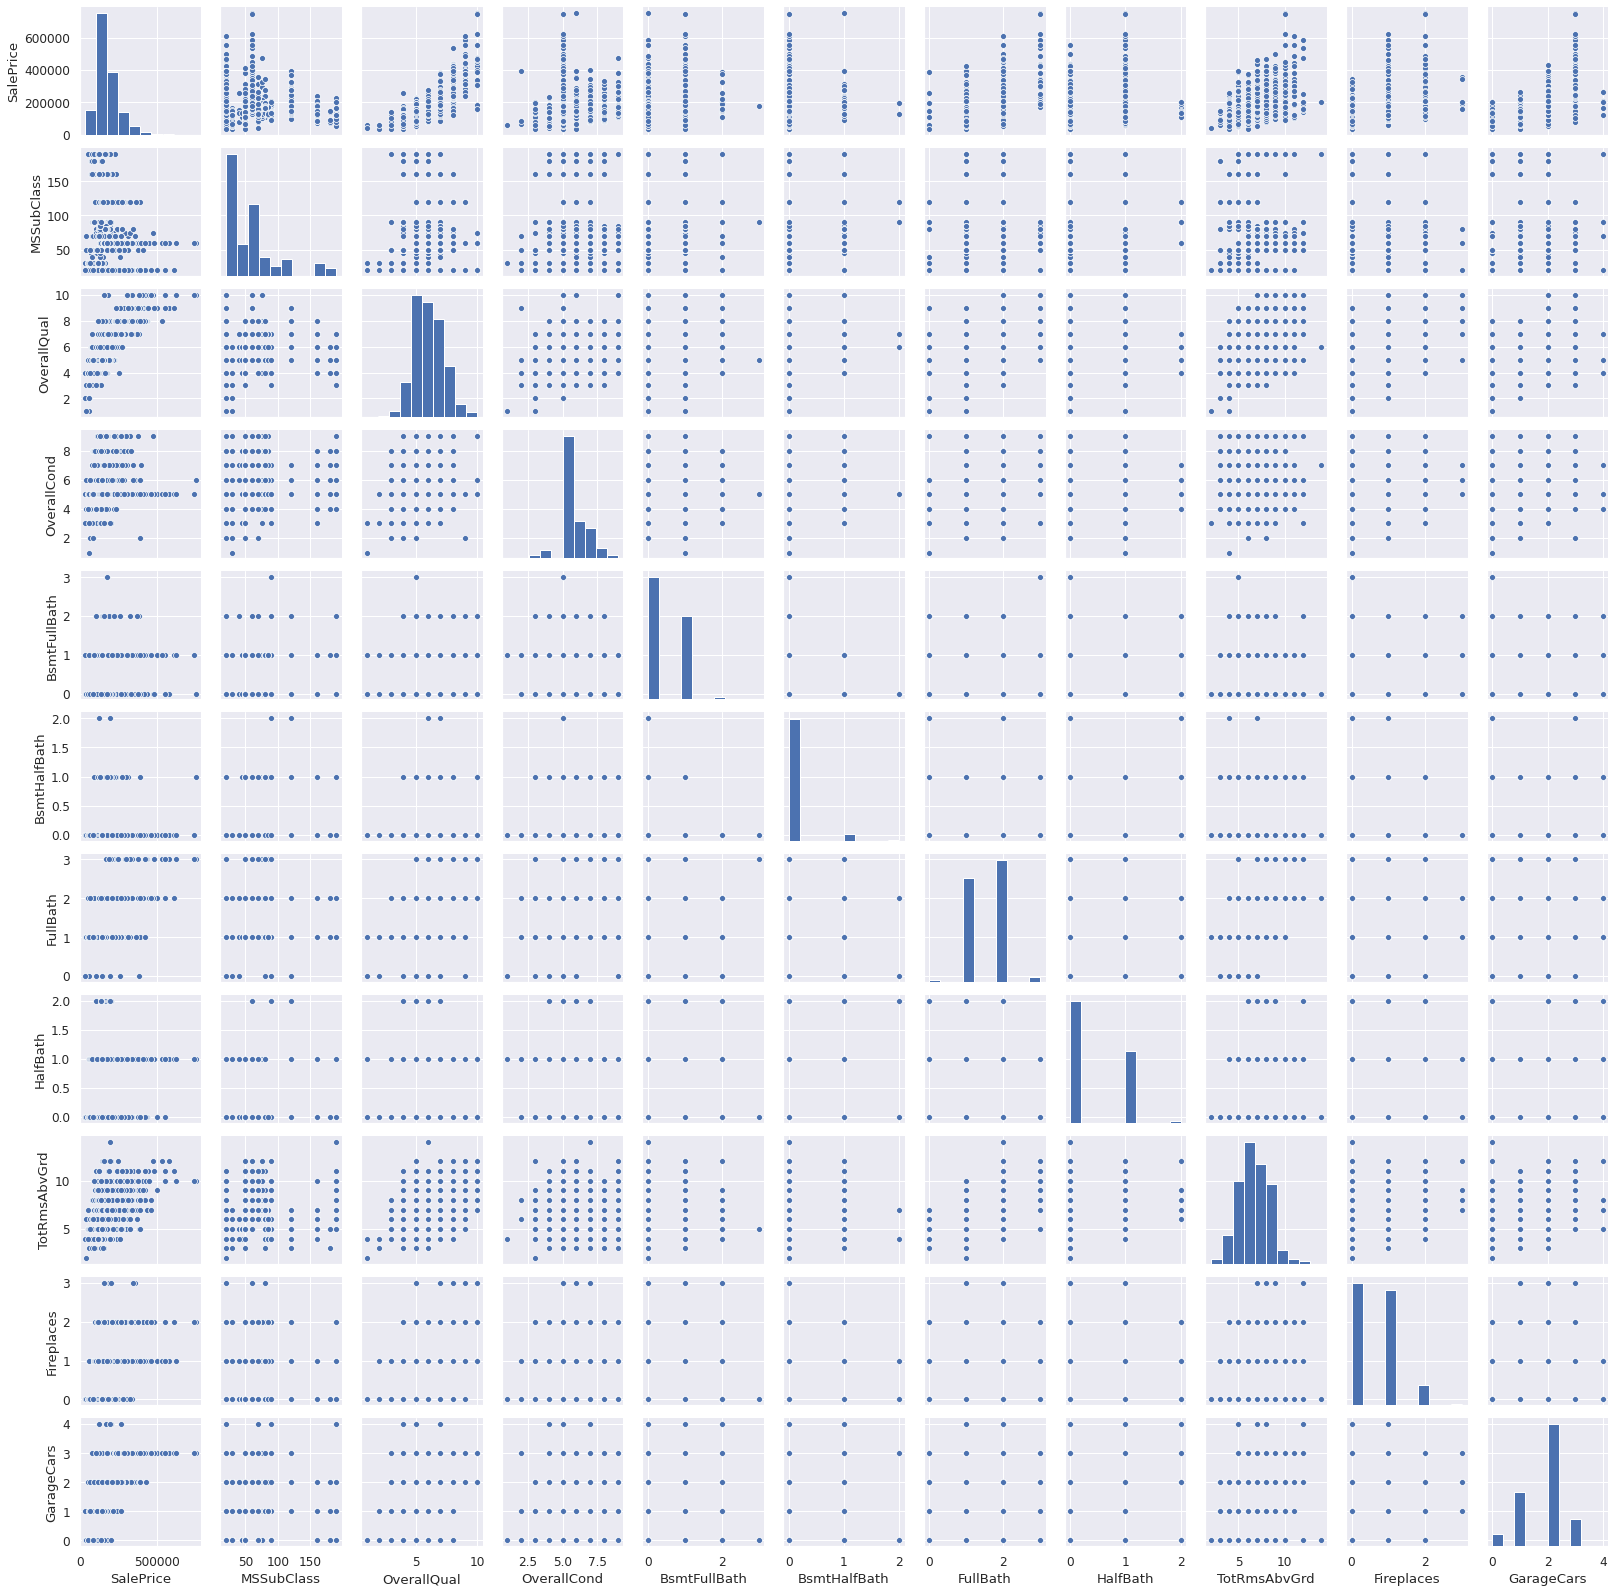

In [15]:
 #Correlation between categorical variables and target variable
  #Obeservation: Based on data exploration below, it worth notice that OverallQual, TotRmsAbvGrd, Neighborhood have correlation with target variable. 
cat_df = house_pricing_data[['SalePrice','MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                        'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
                        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']].copy()
cat_df
sns.pairplot(cat_df, height = 2)

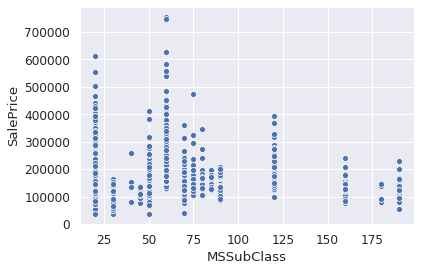

In [16]:
# Sirisha
# Scatter plot: SalePrice vs MSSubClass
sns.scatterplot(cat_df.MSSubClass,cat_df.SalePrice)
# Observation: Certain categories of dwellings appear to have higher sales price. Cannot ignore/drop the variable until validating significance furthermore

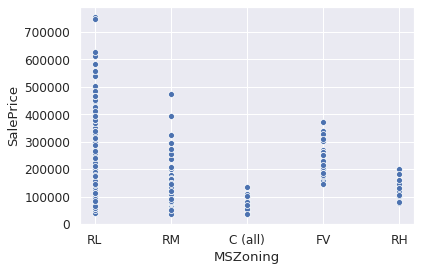

In [17]:
 #Correlation between categorical variables and target variable - MSZoning & SalePrice
  #Data have No association
 sns.scatterplot(cat_df.MSZoning,cat_df.SalePrice)

,Street,SalePrice
0,Grvl,6
1,Pave,1454


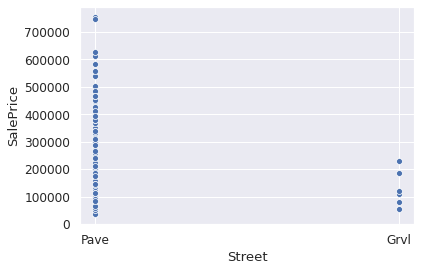

In [22]:
# Sirisha
# Correlation between categorical variables and target variable - Street & SalePrice
# Observation: Although dwellings with gravel access have lesser maximum sale price, there are only 6 observations with 'Gravel street)
sns.scatterplot(cat_df.Street,cat_df.SalePrice)
house_pricing_data.loc[house_pricing_data['Street']=="Grvl"]
house_pricing_data[['SalePrice', 'Street']].groupby(['Street'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

In [ ]:
# Sirisha - Checking the 6 Gravel Street records
house_pricing_data.loc[house_pricing_data['Street']=="Grvl"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageArea_Group,YearBuilt_Group,GarageYrBlt_Group
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,Corner,Mod,IDOTRR,RRNn,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,Gd,TA,Gd,LwQ,104,GLQ,712,0,816,GasA,...,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,NaN,CarPort,1963.0,Unf,2,516,TA,TA,Y,106,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000,500,1950,1950
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,...,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,500,1950,1950
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,...,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,Missing,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500,0,1975,NaN
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,...,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993,500,1950,1950
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,...,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000,1000,1925,1975
1184,1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,226.0,TA,TA,CBlock,TA,TA,Gd,Rec,1159,Unf,0,413,1572,GasA,...,0,0,1572,1,0,1,1,3,1,TA,5,Typ,2,TA,2Types,1963.0,RFn,3,995,TA,TA,Y,0,263,0,0,263,0,NaN,NaN,NaN,0,5,2007,WD,Normal,186700,750,1950,1950


,Alley,SalePrice
2,Pave,41
0,Grvl,50
1,NA,1369


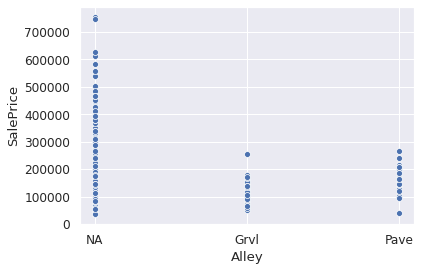

In [23]:
# Sirisha
# Correlation between categorical variables and target variable - Alley & SalePrice
# Data have No association
# Replacing following varialbles' NA with string 'NA' values. 
for col in ['Alley','FireplaceQu','Fence','MiscFeature','PoolQC']:
  house_pricing_data[col].fillna('NA', inplace=True)
sns.scatterplot(house_pricing_data.Alley,house_pricing_data.SalePrice)
house_pricing_data[['SalePrice', 'Alley']].groupby(['Alley'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

,LotShape,SalePrice
2,IR3,10
1,IR2,41
0,IR1,484
3,Reg,925


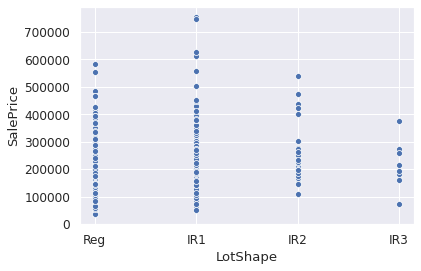

In [24]:
#Correlation between categorical variables and target variable - LotShape & SalePrice
  #Data have No association
sns.scatterplot(cat_df.LotShape, cat_df.SalePrice)
house_pricing_data[['SalePrice', 'LotShape']].groupby(['LotShape'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

,LandContour,SalePrice
2,Low,36
1,HLS,50
0,Bnk,63
3,Lvl,1311


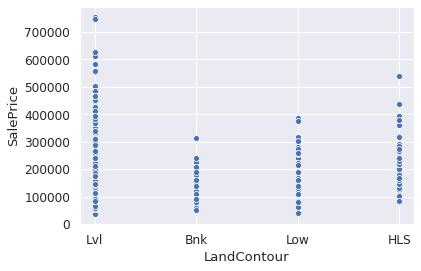

In [25]:
#Correlation between categorical variables and target variable - LandContour & SalePrice
#Data have No association
sns.scatterplot(cat_df.LandContour, cat_df.SalePrice)
house_pricing_data[['SalePrice', 'LandContour']].groupby(['LandContour'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

,Utilities,SalePrice
1,NoSeWa,1
0,AllPub,1459


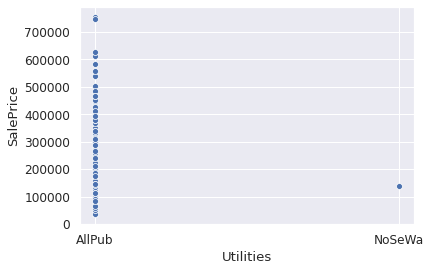

In [26]:
#Correlation between categorical variables and target variable - Utilities & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Utilities, cat_df.SalePrice)
# Sirisha - Good candidate to drop. All but 1 variable has All public utilities - Doesn't add much value to our analysis
house_pricing_data[['SalePrice', 'Utilities']].groupby(['Utilities'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

,Count,Mean_SalePrice
LotConfig,,
Corner,263,181623.425856
CulDSac,94,223854.617021
FR2,47,177934.574468
FR3,4,208475.000000
Inside,1052,176938.047529


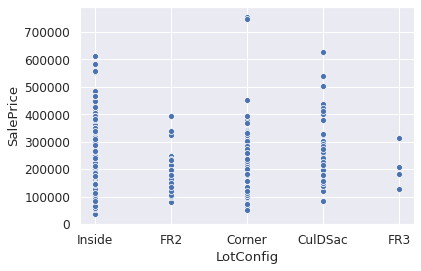

In [31]:
#Correlation between categorical variables and target variable - LotConfig & SalePrice
  #Data have No association
sns.scatterplot(cat_df.LotConfig, cat_df.SalePrice)
# Sirisha
# house_pricing_data[['SalePrice', 'LotConfig']].groupby(['LotConfig'], as_index=False).count().sort_values(by='SalePrice', ascending=True)
house_pricing_data.groupby('LotConfig').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'Count','SalePrice':'Mean_SalePrice'})

,count,mean_price
LandSlope,,
Gtl,1382,179957.0
Mod,65,196734.0
Sev,13,204379.0


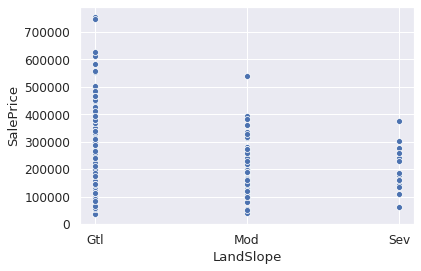

In [36]:
#Correlation between categorical variables and target variable - LandSlope & SalePrice
  #Data have No association
sns.scatterplot(cat_df.LandSlope, cat_df.SalePrice)
# Sirisha
# Clear trend to see is that the gentler the slope, the higher the selling price. The average price might seem misleading because of the varying size of the samples 
house_pricing_data.groupby('LandSlope').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0)

,count,mean_price
Neighborhood,,
NoRidge,41,335295.0
NridgHt,77,316271.0
StoneBr,25,310499.0
Timber,38,242247.0
Veenker,11,238773.0
Somerst,86,225380.0
ClearCr,28,212565.0
Crawfor,51,210625.0
CollgCr,150,197966.0


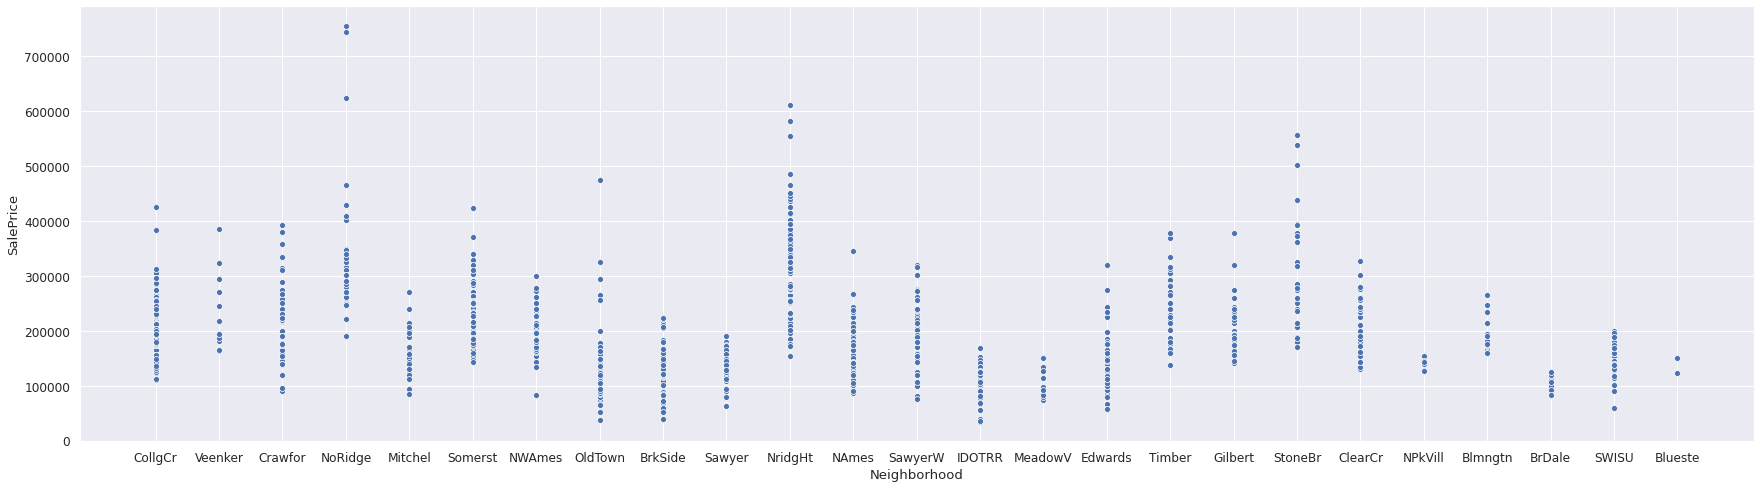

In [40]:
#Correlation between categorical variables and target variable - Neighborhood & SalePrice
  #Some neighborhoods are more expensive than others
plt.figure(figsize=(30, 8))
sns.scatterplot(cat_df.Neighborhood, cat_df.SalePrice)
# Sirisha - Understand what are the affluent neighbourhoods within the Ames City limits. We can use bins to categorize neighbourhood by Average price and convert to nominal variable
house_pricing_data.groupby('Neighborhood').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

,count,mean_price,LotArea
Condition1,,,
PosA,8,225875.0,16612.0
PosN,19,215184.0,12733.0
RRNn,5,212400.0,9047.0
RRNe,2,190750.0,9372.0
Norm,1260,184495.0,10418.0
RRAn,26,184397.0,11982.0
Feedr,81,142475.0,10730.0
RRAe,11,138400.0,11714.0
Artery,48,135092.0,10001.0


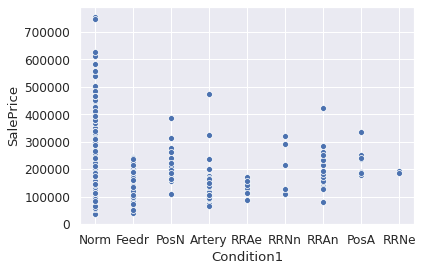

In [43]:
#Correlation between categorical variables and target variable - Condition1 & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Condition1, cat_df.SalePrice)
# Sirisha - Understand mean pricing of houses based on proximity to transport/other amenities. Keeping other factors in perspective, proximity to transport tends to increase the sale price. 
# Interesting insight here is that adjacency to East West Railroad has the second least average sale price
house_pricing_data.groupby('Condition1').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

,count,mean_price,LotArea
Condition2,,,
PosA,1,325000.0,13500.0
PosN,2,284875.0,27448.0
RRAe,1,190000.0,18890.0
Norm,1445,181169.0,10498.0
RRAn,1,136905.0,11500.0
Feedr,6,121167.0,8813.0
Artery,2,106500.0,9018.0
RRNn,2,96750.0,7280.0


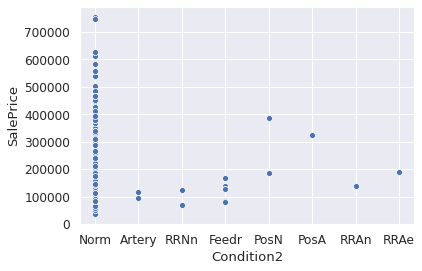

In [44]:
#Correlation between categorical variables and target variable - Condition2 & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Condition2, cat_df.SalePrice)
# Sirisha - Condition1 and Condition 2 are good candidates to convert to nominal features and enginner an attribute that is a sum of both these factors. 
house_pricing_data.groupby('Condition2').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

,count,mean_price,LotArea
BldgType,,,
1Fam,1220,185764.0,11241.0
TwnhsE,114,181959.0,4767.0
Twnhs,43,135912.0,2391.0
Duplex,52,133541.0,9720.0
2fmCon,31,128432.0,15785.0


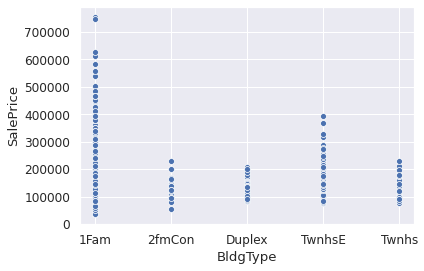

In [46]:
#Correlation between categorical variables and target variable - BldgType & SalePrice
  #Data have No association
sns.scatterplot(cat_df.BldgType, cat_df.SalePrice)
# Sirisha - As Expected, Single Family Detached homes appear to have higher sale prices compared to other models. Similarly, Townhouse End units are pricier compared to the Inside units. 
house_pricing_data.groupby('BldgType').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

,count,mean_price,LotArea
HouseStyle,,,
2.5Fin,8,220000.0,12468.0
2Story,445,210052.0,10325.0
1Story,726,175985.0,10644.0
SLvl,65,166703.0,10538.0
2.5Unf,11,157355.0,9153.0
1.5Fin,154,143117.0,11449.0
SFoyer,37,135074.0,7673.0
1.5Unf,14,110150.0,7119.0


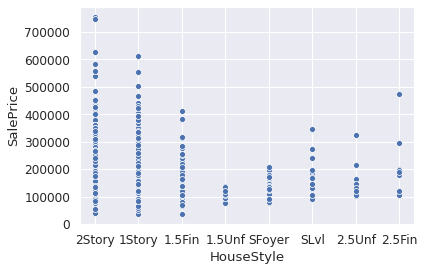

In [48]:
#Correlation between categorical variables and target variable - HouseStyle & SalePrice
  #Data have No association
sns.scatterplot(cat_df.HouseStyle, cat_df.SalePrice)
#  Sirisha - Distribution of mean price and Lot Area
house_pricing_data.groupby('HouseStyle').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

,count,mean_price,LotArea
RoofStyle,,,
Shed,2,225000.0,21242.0
Hip,286,218877.0,12278.0
Flat,13,194690.0,22536.0
Mansard,7,180568.0,11089.0
Gable,1141,171484.0,9927.0
Gambrel,11,148909.0,9434.0


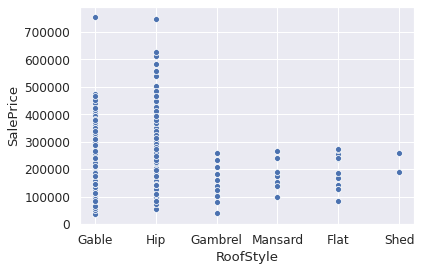

In [49]:
#Correlation between categorical variables and target variable - RoofStyle & SalePrice
  #Data have No association
sns.scatterplot(cat_df.RoofStyle, cat_df.SalePrice)

#  Sirisha - Gable and Hip are the most common rooftypes and Hips are pricier. 
house_pricing_data.groupby('RoofStyle').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

,count,mean_price,LotArea
RoofMatl,,,
WdShngl,6,390250.0,30690.0
Membran,1,241500.0,39104.0
WdShake,5,241400.0,15798.0
Tar&Grv,11,185406.0,20733.0
Metal,1,180000.0,21453.0
CompShg,1434,179804.0,10270.0
ClyTile,1,160000.0,63887.0
Roll,1,137000.0,11345.0


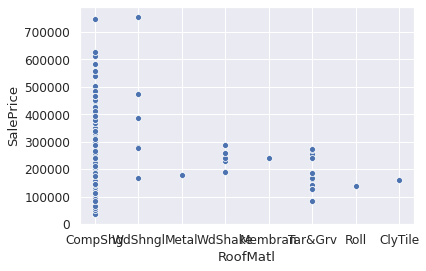

In [50]:
#Correlation between categorical variables and target variable - RoofMatl & SalePrice
  #Data have No association
sns.scatterplot(cat_df.RoofMatl, cat_df.SalePrice)

#  Sirisha - 
house_pricing_data.groupby('RoofMatl').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

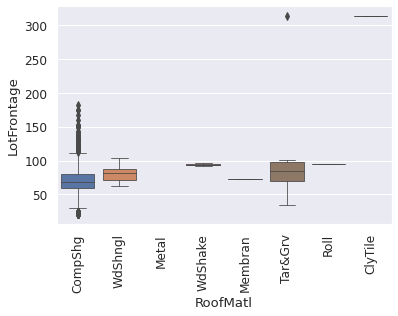

In [61]:
sns.boxplot(x=house_pricing_data['RoofMatl'], y=house_pricing_data['LotFrontage'], linewidth=0.8)
# plt.setp(label ,rotation=45, fontsize=8)
plt.xticks(rotation = 90)

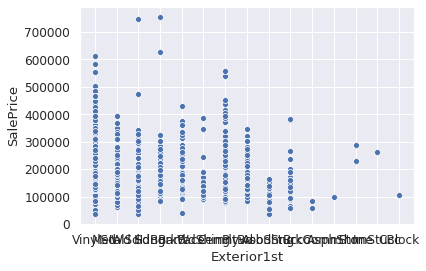

In [ ]:
#Correlation between categorical variables and target variable - Exterior1st & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Exterior1st, cat_df.SalePrice)

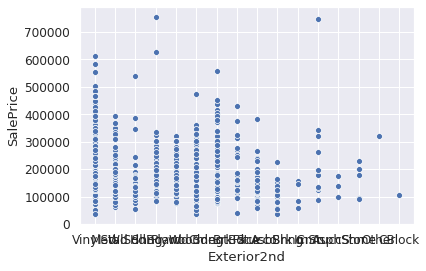

In [ ]:
#Correlation between categorical variables and target variable - Exterior2nd & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Exterior2nd, cat_df.SalePrice)

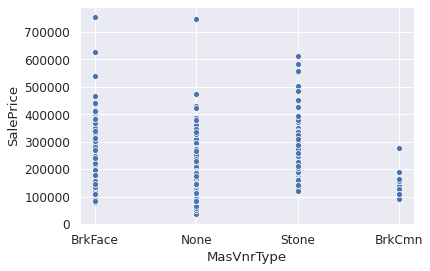

In [ ]:
#Correlation between categorical variables and target variable - MasVnrType & SalePrice
  #Data have No association
sns.scatterplot(cat_df.MasVnrType, cat_df.SalePrice)

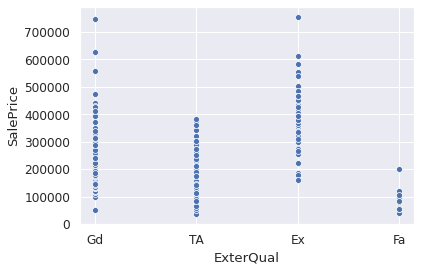

In [ ]:
#Correlation between categorical variables and target variable - ExterQual & SalePrice
  #Data have No association
sns.scatterplot(cat_df.ExterQual, cat_df.SalePrice)

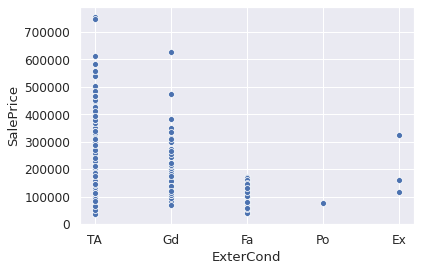

In [ ]:
#Correlation between categorical variables and target variable - ExterCond & SalePrice
  #Data have No association
sns.scatterplot(cat_df.ExterCond, cat_df.SalePrice)

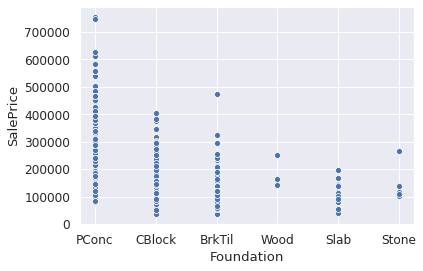

In [ ]:
#Correlation between categorical variables and target variable - Foundation & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Foundation, cat_df.SalePrice)

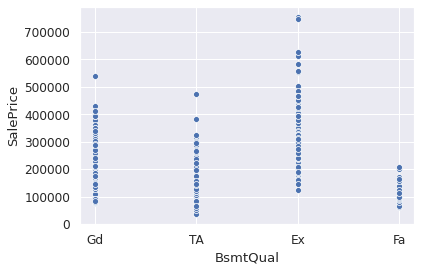

In [ ]:
#Correlation between categorical variables and target variable - BsmtQual & SalePrice
  #Data have No association
sns.scatterplot(cat_df.BsmtQual, cat_df.SalePrice)

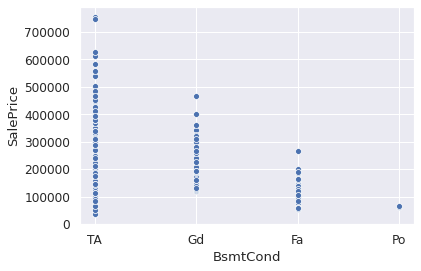

In [ ]:
#Correlation between categorical variables and target variable - BsmtCond & SalePrice
  #Data have No association
sns.scatterplot(cat_df.BsmtCond, cat_df.SalePrice)

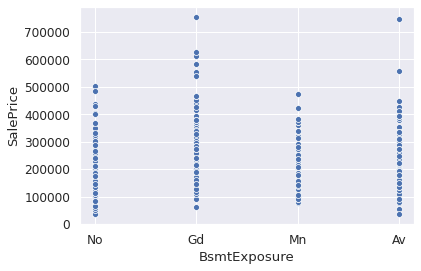

In [ ]:
#Correlation between categorical variables and target variable - BsmtExposure & SalePrice
  #Data have No association
sns.scatterplot(cat_df.BsmtExposure, cat_df.SalePrice)

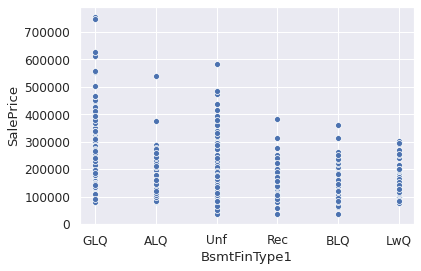

In [ ]:
#Correlation between categorical variables and target variable - BsmtFinType1 & SalePrice
  #Data have No association
sns.scatterplot(cat_df.BsmtFinType1, cat_df.SalePrice)

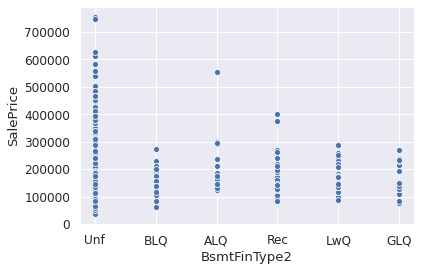

In [ ]:
#Correlation between categorical variables and target variable - BsmtFinType2 & SalePrice
  #Data have No association
sns.scatterplot(cat_df.BsmtFinType2, cat_df.SalePrice)

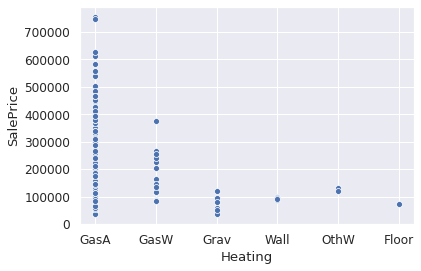

In [ ]:
#Correlation between categorical variables and target variable - Heating & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Heating, cat_df.SalePrice)

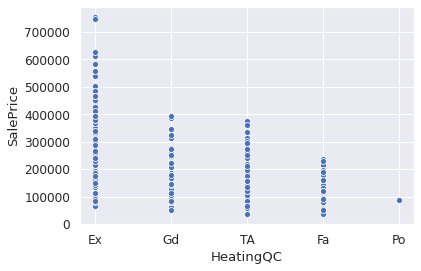

In [ ]:
#Correlation between categorical variables and target variable - HeatingQC & SalePrice
  #Data have No association
sns.scatterplot(cat_df.HeatingQC, cat_df.SalePrice)

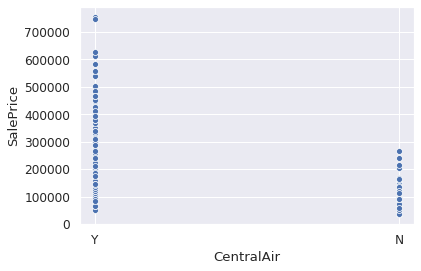

In [ ]:
#Correlation between categorical variables and target variable - CentralAir & SalePrice
  #Data have No association
sns.scatterplot(cat_df.CentralAir, cat_df.SalePrice)

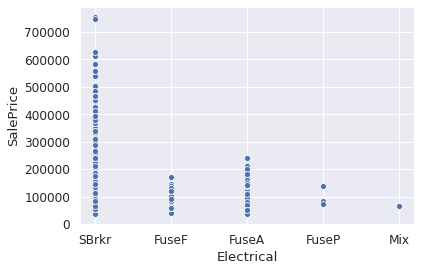

In [ ]:
#Correlation between categorical variables and target variable - Electrical & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Electrical, cat_df.SalePrice)

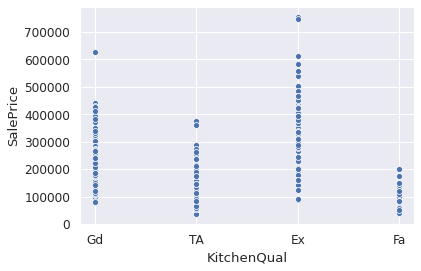

In [ ]:
#Correlation between categorical variables and target variable - KitchenQual & SalePrice
  #Data have No association
sns.scatterplot(cat_df.KitchenQual, cat_df.SalePrice)

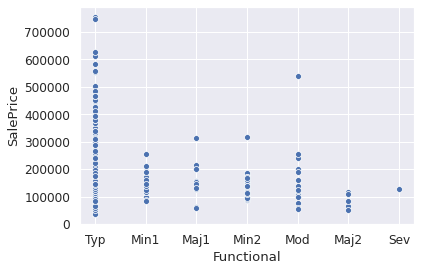

In [ ]:
#Correlation between categorical variables and target variable - Functional & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Functional, cat_df.SalePrice)

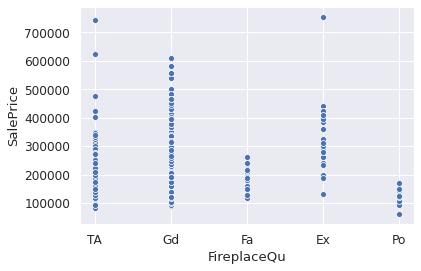

In [ ]:
#Correlation between categorical variables and target variable - FireplaceQu & SalePrice
  #Data have No association
sns.scatterplot(cat_df.FireplaceQu, cat_df.SalePrice)

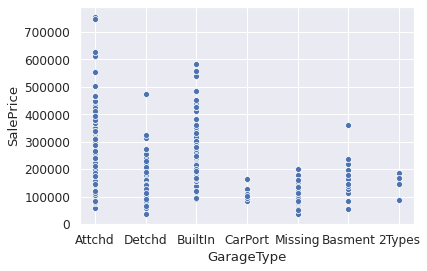

In [ ]:
#Correlation between categorical variables and target variable - GarageType & SalePrice
  #Data have No association
sns.scatterplot(cat_df.GarageType, cat_df.SalePrice)

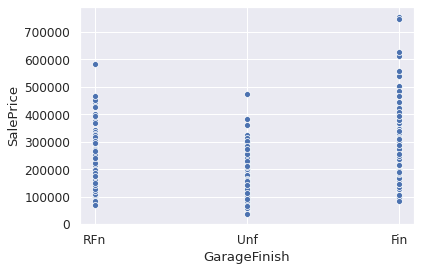

In [ ]:
#Correlation between categorical variables and target variable - GarageFinish & SalePrice
  #Data have No association
sns.scatterplot(cat_df.GarageFinish, cat_df.SalePrice)

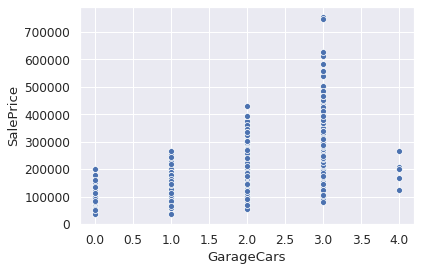

In [ ]:
#Correlation between categorical variables and target variable - GarageCars & SalePrice
  #Data have No association
sns.scatterplot(cat_df.GarageCars, cat_df.SalePrice)

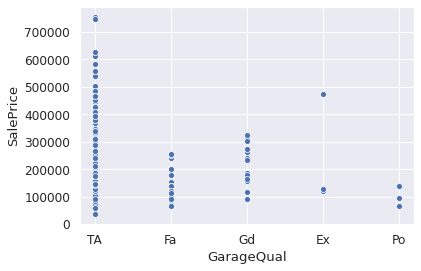

In [ ]:
#Correlation between categorical variables and target variable - GarageQual & SalePrice
  #Data have No association
sns.scatterplot(cat_df.GarageQual, cat_df.SalePrice)

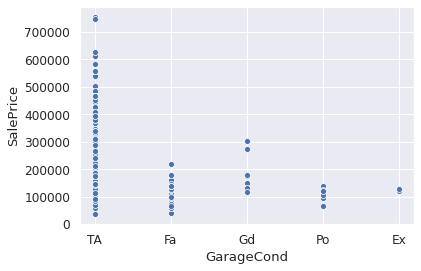

In [ ]:
#Correlation between categorical variables and target variable - GarageCond & SalePrice
  #Data have No association
sns.scatterplot(cat_df.GarageCond, cat_df.SalePrice)

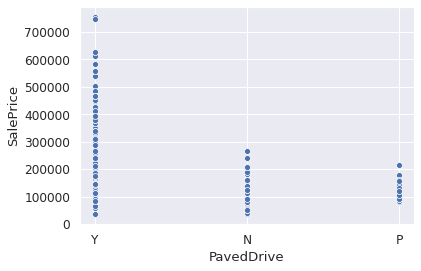

In [ ]:
#Correlation between categorical variables and target variable - PavedDrive & SalePrice
  #Data have No association
sns.scatterplot(cat_df.PavedDrive, cat_df.SalePrice)

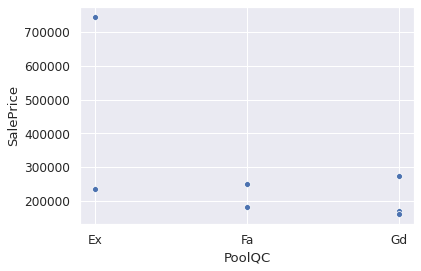

In [ ]:
#Correlation between categorical variables and target variable - PoolQC & SalePrice
  #Data have No association
sns.scatterplot(cat_df.PoolQC, cat_df.SalePrice)

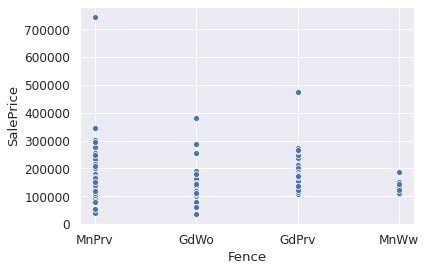

In [ ]:
#Correlation between categorical variables and target variable - Fence & SalePrice
  #Data have No association
sns.scatterplot(cat_df.Fence, cat_df.SalePrice)

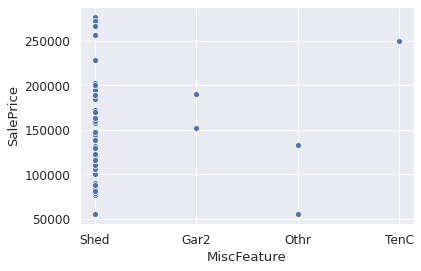

In [ ]:
#Correlation between categorical variables and target variable - MiscFeature & SalePrice
  #Data have No association
sns.scatterplot(cat_df.MiscFeature, cat_df.SalePrice)

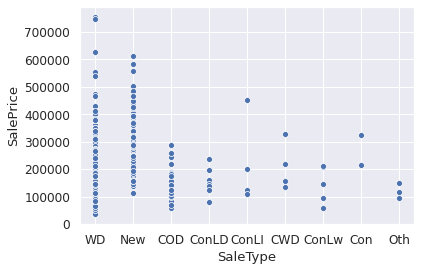

In [ ]:
#Correlation between categorical variables and target variable - SaleType & SalePrice
  #Data have No association
sns.scatterplot(cat_df.SaleType, cat_df.SalePrice)

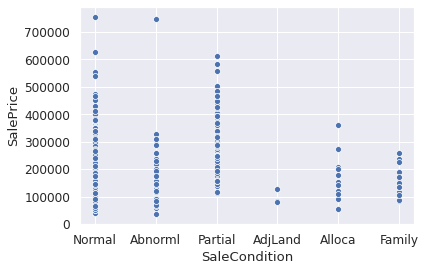

In [ ]:
#Correlation between categorical variables and target variable - SaleCondition & SalePrice
  #Data have No association
sns.scatterplot(cat_df.SaleCondition, cat_df.SalePrice)

# Data Exploration - Multivariate Analysis

In [ ]:
#Yezhou Jiang
#Will complete this part later

# **Missing Garage Data**
*Steve*

I would infer that where GarageYrBlt, GarageFinish, GarageQual, & GarageCond are missing, there is no garage given GarageCars & GarageArea are zero in these cases.

Search the web and at best only 78% of US homes have garages/carports. In our case, just under 6% of homes do not have garages. If anything, it appears only 5.5% of homes in Ames, Iowa do not have garages.

https://www.energy.gov/eere/vehicles/fact-958-january-2-2017-sixty-three-percent-all-housing-units-have-garage-or-carport

In [ ]:
pd.pivot_table(house_pricing_data, values='GarageCars',\
               index=['GarageType'], aggfunc='count',margins=False).apply(lambda x: x/x.sum(), axis=0)

,GarageCars
GarageType,
2Types,0.004110
Attchd,0.595890
Basment,0.013014
BuiltIn,0.060274
CarPort,0.006164
Detchd,0.265068
Missing,0.055479


In [ ]:
# Steve

# I pivoted GarageType many ways and there was nothing that stuck out. Most 
# homes have attached or detached garages. Here's the code if any wants to try
# pd.pivot_table(house_pricing_data, values='GarageCars',\
#               index=['Neighborhood'], columns=['GarageType','GarageArea_Group'], aggfunc='count',margins=True)

garage=house_pricing_data.filter(regex='Garage')
garage.info()

x=(garage['GarageArea']==0) | (garage['GarageCars']==0)
results=garage[x]
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GarageType         1460 non-null   object  
 1   GarageYrBlt        1379 non-null   float64 
 2   GarageFinish       1379 non-null   object  
 3   GarageCars         1460 non-null   int64   
 4   GarageArea         1460 non-null   int64   
 5   GarageQual         1379 non-null   object  
 6   GarageCond         1379 non-null   object  
 7   GarageArea_Group   1460 non-null   category
 8   GarageYrBlt_Group  1379 non-null   category
dtypes: category(2), float64(1), int64(2), object(4)
memory usage: 83.2+ KB


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,GarageArea_Group,GarageYrBlt_Group
39,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
48,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
78,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
88,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
89,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...
1349,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
1407,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
1449,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN
1450,Missing,NaN,NaN,0,0,NaN,NaN,0,NaN


In [ ]:
# Steve
# Checking data quality
# Checking that there are truly 1460 rows.
display(house_pricing_data.Id.isna().any())
house_pricing_data.Id.isna().count()

False

1460

In [ ]:
# Steve

def describe(df):
    return pd.concat([df.describe().T,
                      df.median().rename('median'), 
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

describe(house_pricing_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])

# Fields with numeric data and missing data (per Sean below) - 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000
median,69.000000,1980.000000,0.000000
skew,2.163569,-0.649415,2.669084


## Determining rate of missing values across all attributes

In [ ]:
#Sean

#Check if any null value
display(house_pricing_data.isnull().values.any())

#Calculate the missing value rate
missing_value = house_pricing_data.isnull().sum()
missing_value_rate = (missing_value[missing_value > 0] / len(house_pricing_data)).sort_values(ascending = False)
missing_value_rate

True

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

# Dropping a few attributes
Dropping columns with missing values > 30%

In [ ]:
#Sean

#Find the columns with missing value rate more than 30%, which columns might need to be dropped
#Drop columns found above

col_to_drop = missing_value_rate[missing_value_rate > 0.3].index
display(col_to_drop)
house_pricing_data = house_pricing_data.drop(col_to_drop, axis = 1)
house_pricing_data.info()

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Filling in missing values

In [ ]:
#Sean

#Columns with missing values that have not been dropped 

col_not_drop = missing_value_rate[missing_value_rate <= 0.3].index
col_not_drop

Index(['LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [ ]:
#Sean 

#Since the data type in some of the columns above is string, now to find the columns with numeric data

numeric_col = house_pricing_data[col_not_drop]._get_numeric_data().columns
numeric_col


Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

### Filling missing values for non numeric attributes



*   Electrical : This attribute is being filled with the most common type (mode).
*   Basement Attributes: It is important to note that NA in bsmtQual, bsmtCond, bsmtExposure, bsmtFinType1, and bsmtFinType2, actually means there is no basement. If all 5 variables above are NA, then they are converted to “No Basement.”
Rest of rows with any basement categorical attributes as Na are dropped.
* Garage attributes: 


In [ ]:
#Aparna

#Filling in some na values for Electrical with mode
display(house_pricing_data['Electrical'].mode())
house_pricing_data['Electrical'] = house_pricing_data['Electrical'].fillna("SBrkr")   

def bsmtNAfunction(x, col) :
  if pd.isna(x[col]):
    if (pd.isna(x['BsmtQual']) and pd.isna(x['BsmtCond']) and pd.isna(x['BsmtExposure']) and pd.isna(x['BsmtFinType1']) and pd.isna(x['BsmtFinType2'])):
      return 'No Basement'
    else:
      return x[col]
  else:
    return x[col]

#Filling in basement related attributes
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house_pricing_data[col] = house_pricing_data.apply(lambda x : bsmtNAfunction(x, col), axis = 1)
house_pricing_data.dropna(subset=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], inplace=True)

#TODO: figure out a better logic
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house_pricing_data[col] = house_pricing_data[col].fillna('None')

0    SBrkr
dtype: object

### Filling missing values for numeric attributes



*   LotFrontage : LotFrontage attribute is related to the Neighborhood and GarageCar. The box plots below indicate the same. The more cars the garage can fit the more LotFrontage it has. Also every neighborhood that have a fairly distinct spread of LotFrontage values. Hence grouping the data by Neighborhood and GarageCar should form distinct groups whose median can be used as a value to fill in NaNs.
*   GarageYrBlt: GarageYrBlt attribute is related to the GarageQual and GarageCond. The quality and condition of the garage built from ealier years could have poor quality and condition. By grouping GarageQual and GarageCond then will be able to have different groups with their medians which we are using to fill in NaNs.
*   MasVnrArea: MasVnrArea attribute is not related to any other attributes so just simply fill NaNs with its median, but except for those MasVnrType is None.






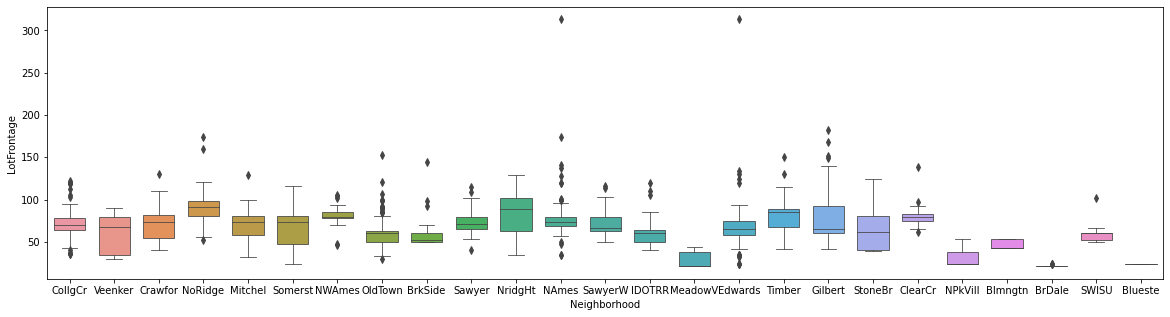

In [ ]:
#Aparna 
# Neighborhood vs. LotFrontage
plt.figure(figsize=(20,5))
sns.boxplot(x=house_pricing_data['Neighborhood'], y=house_pricing_data['LotFrontage'], width=0.7, linewidth=0.8)

True

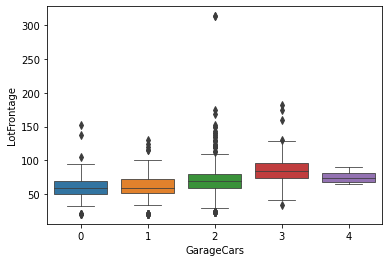

In [ ]:
#Aparna 
# Neighborhood vs. LotFrontage
sns.boxplot(x=house_pricing_data['GarageCars'], y=house_pricing_data['LotFrontage'], linewidth=0.8)

house_pricing_data['LotFrontage'] = house_pricing_data.groupby(['Neighborhood', 'GarageCars'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
house_pricing_data['LotFrontage'].isnull().values.any()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   Alley          91 non-null     object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  RoofStyle      1460 non-null   object 
 14  RoofMatl       1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  ExterQua

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

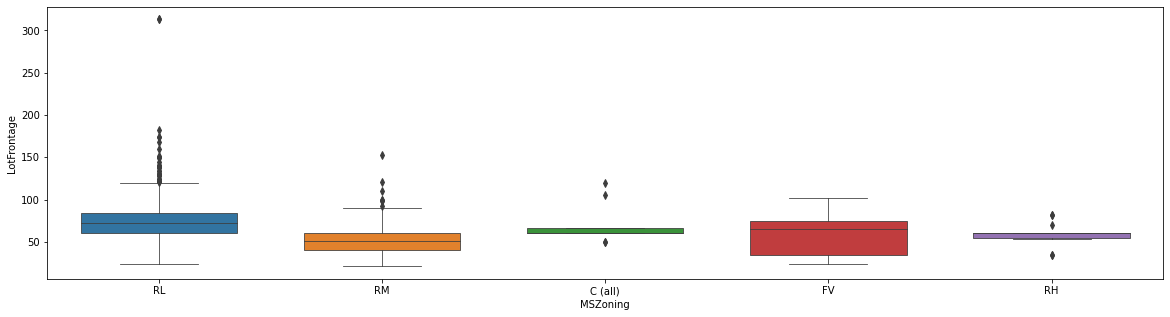

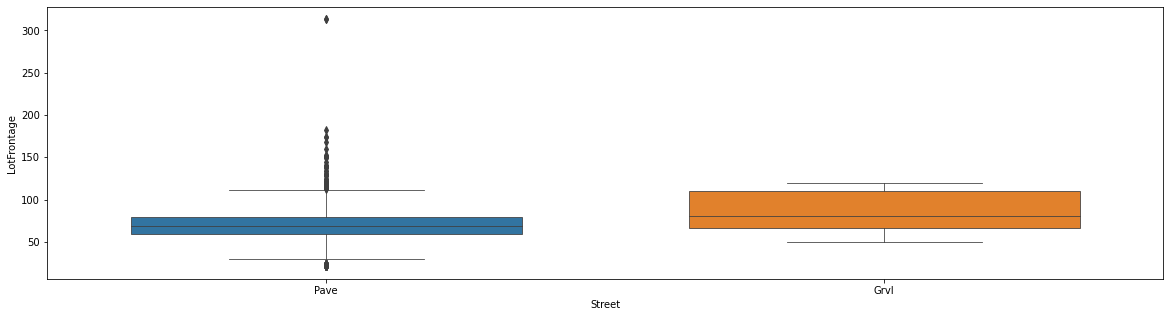

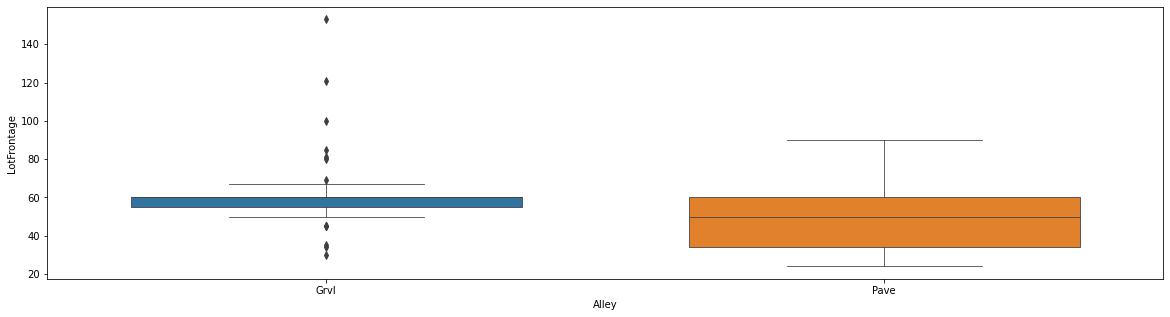

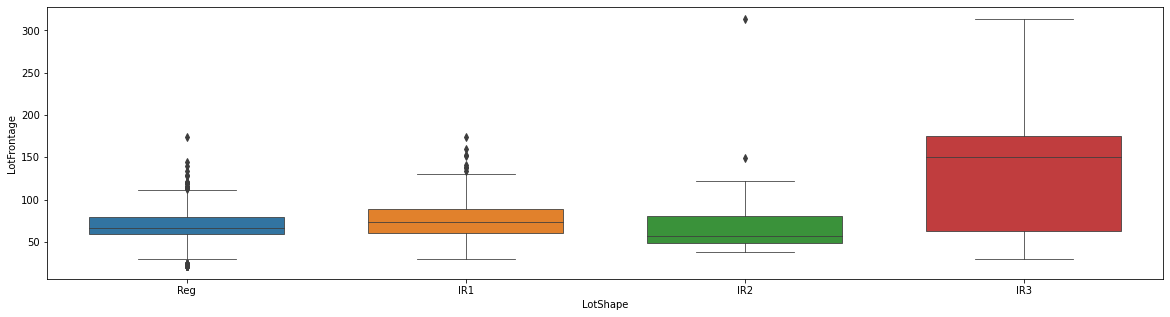

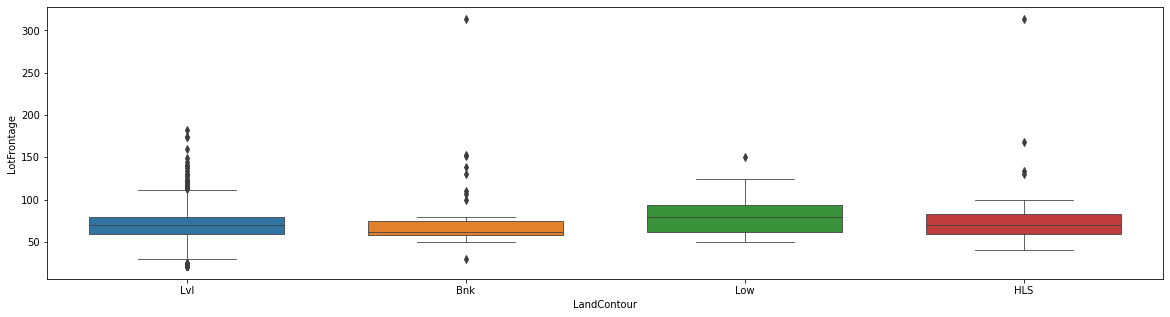

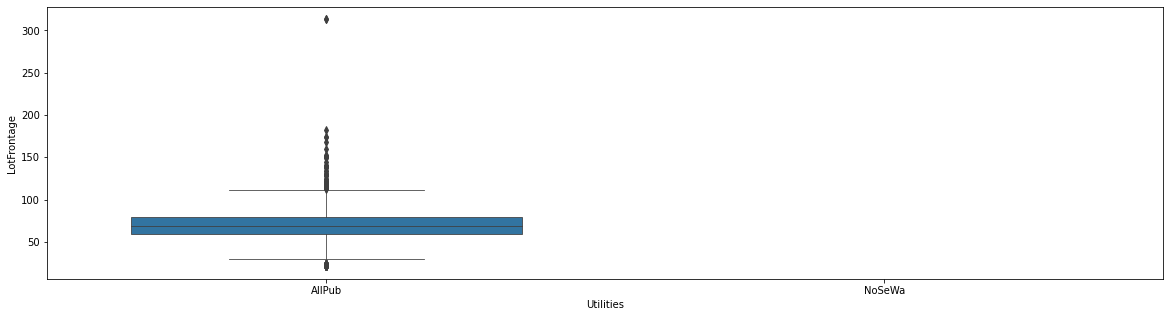

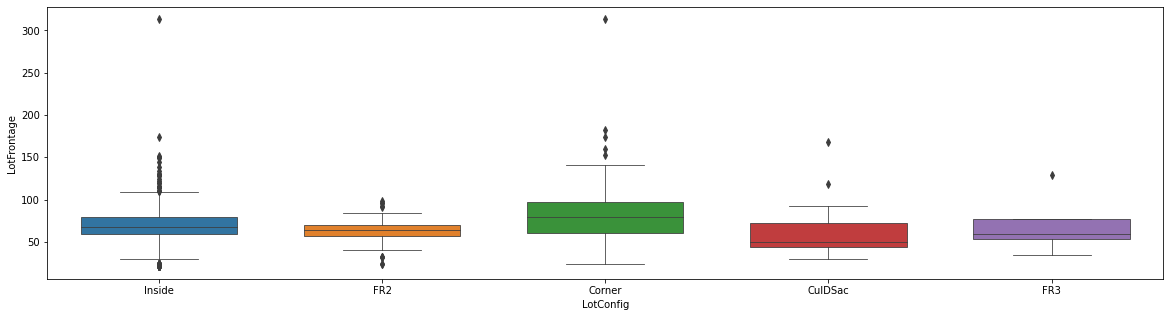

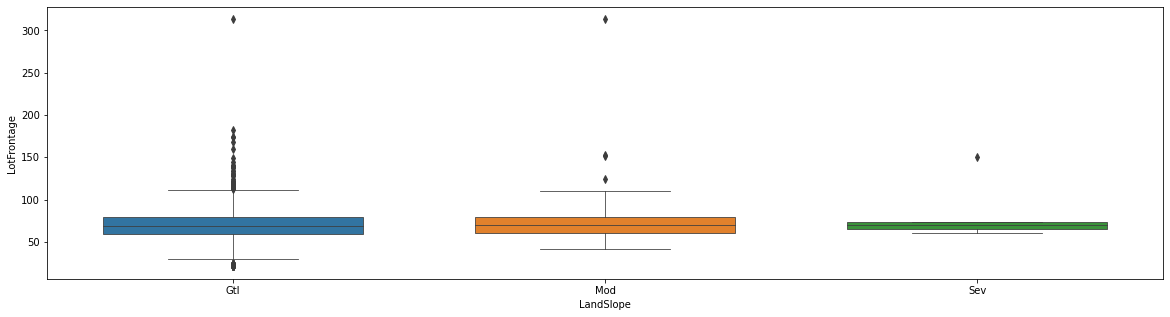

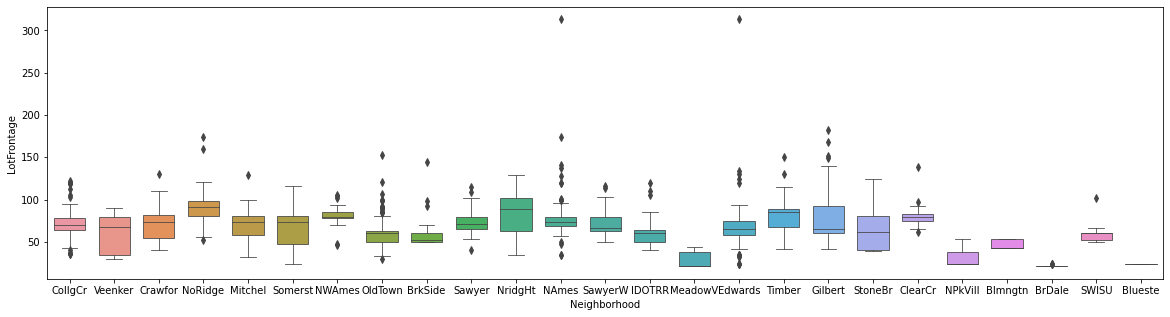

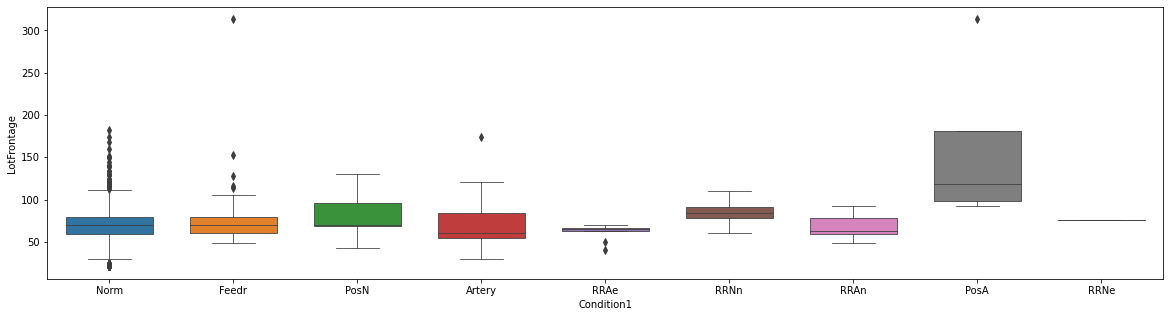

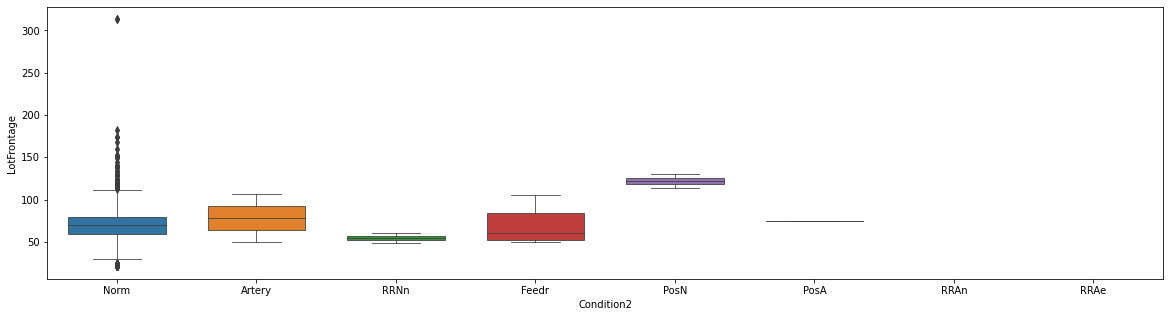

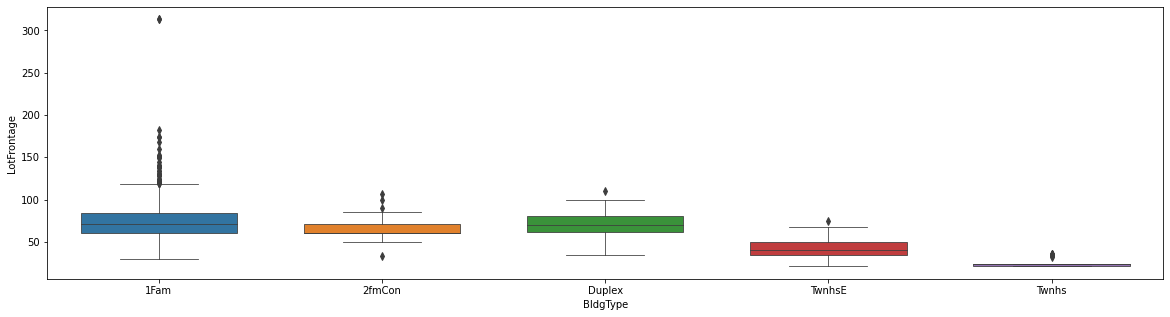

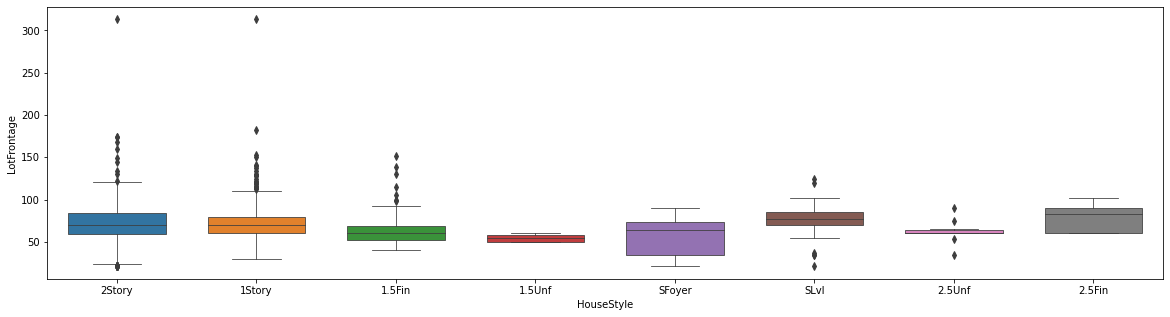

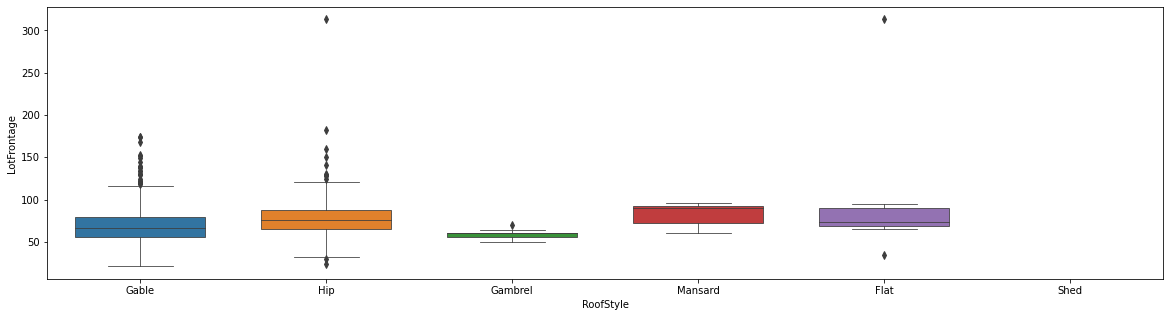

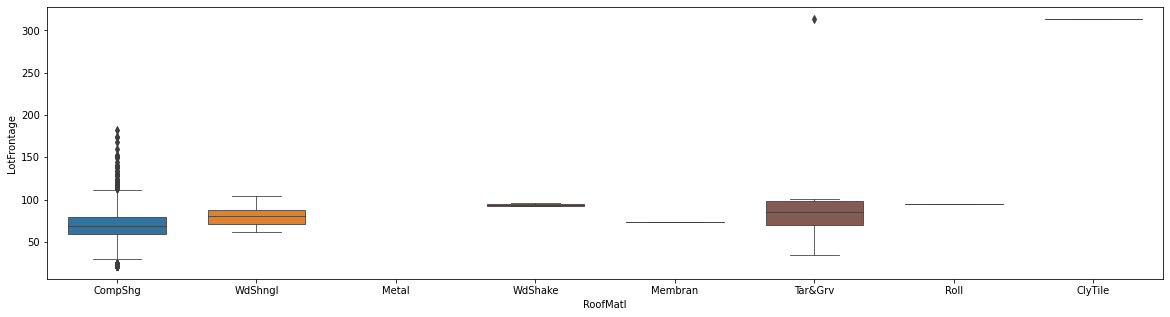

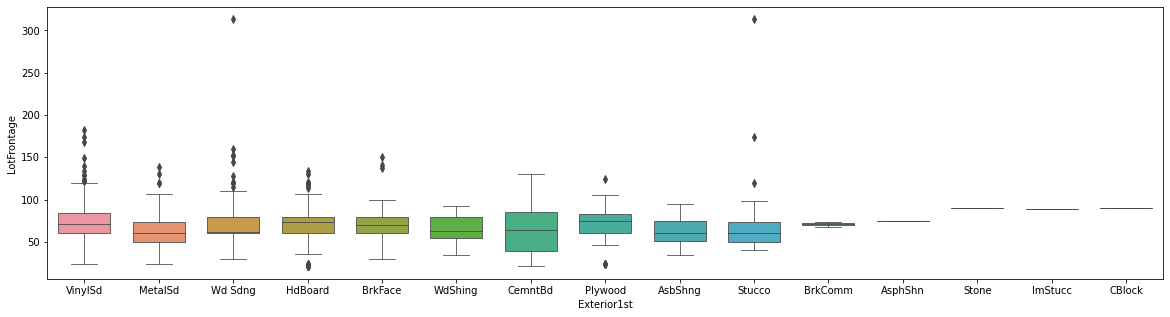

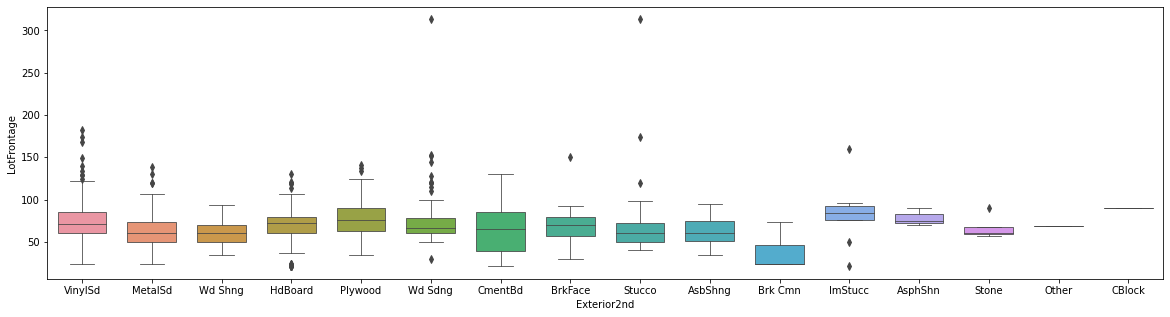

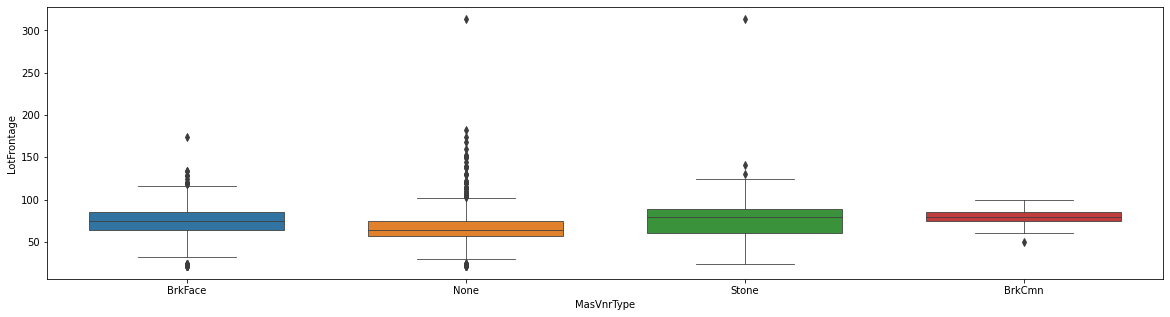

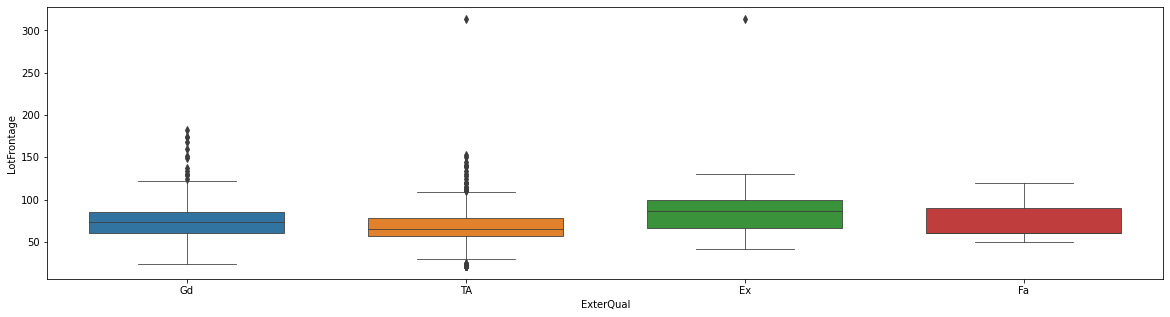

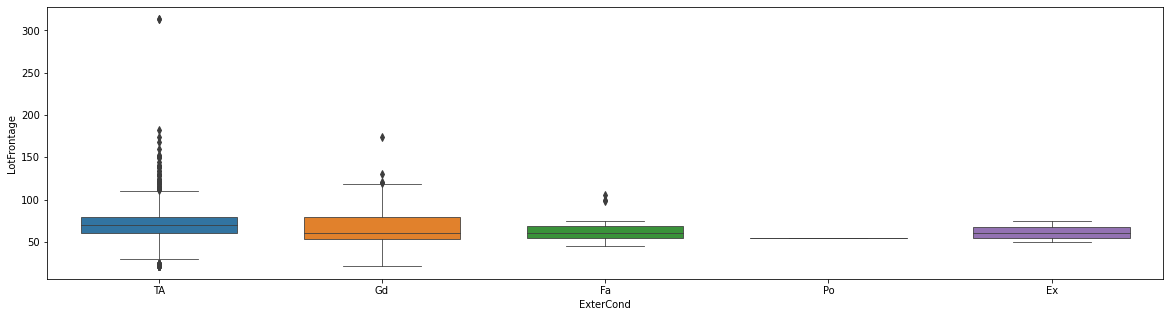

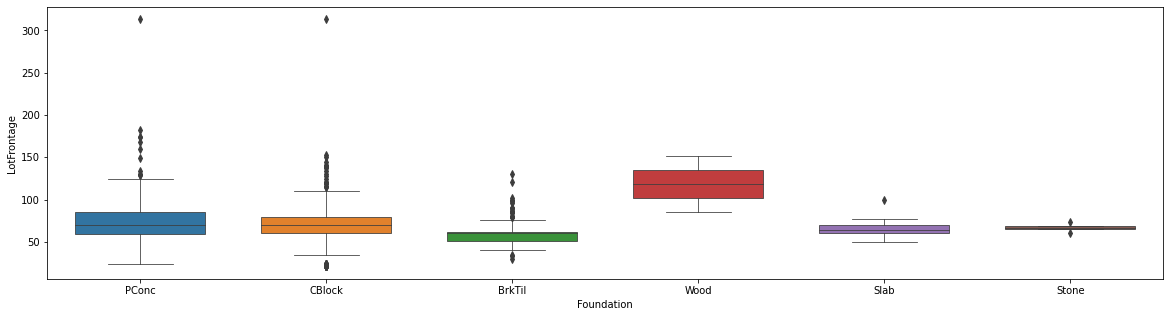

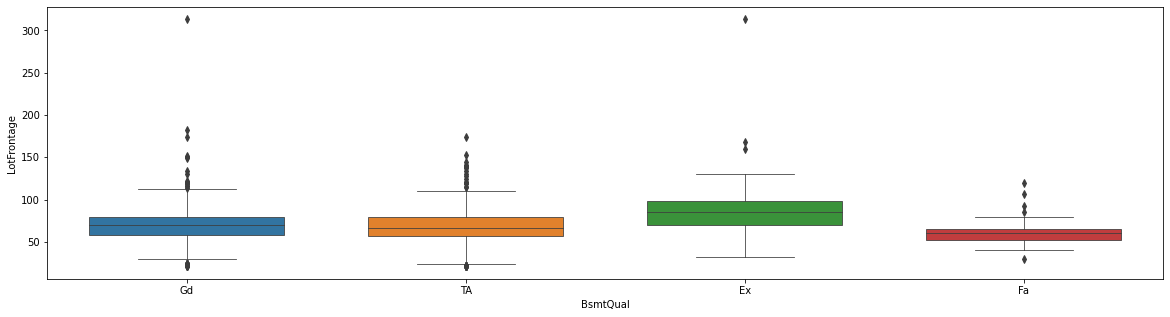

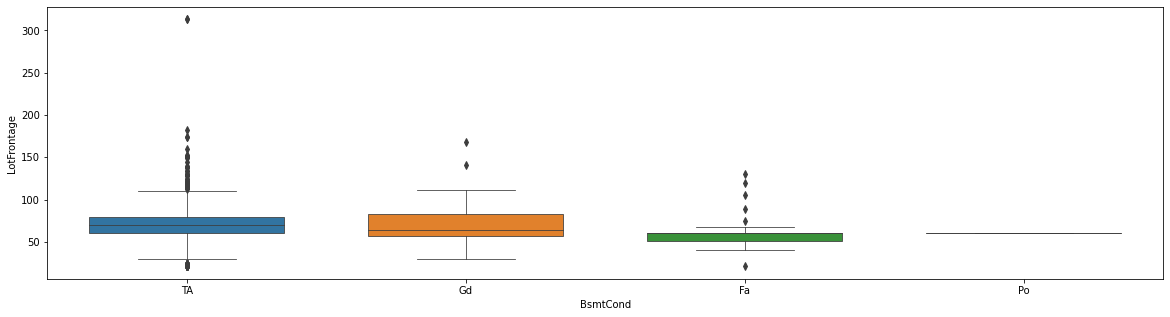

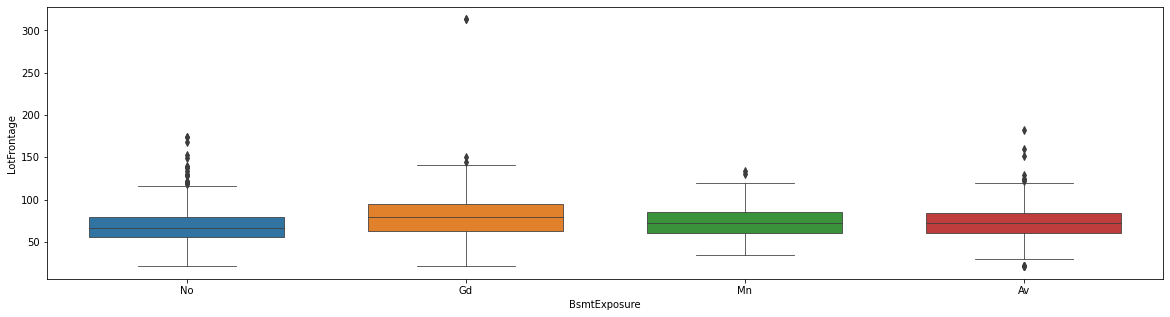

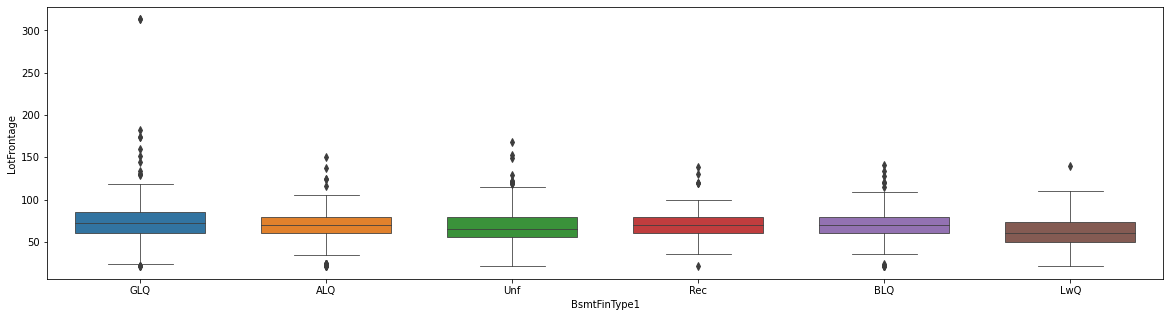

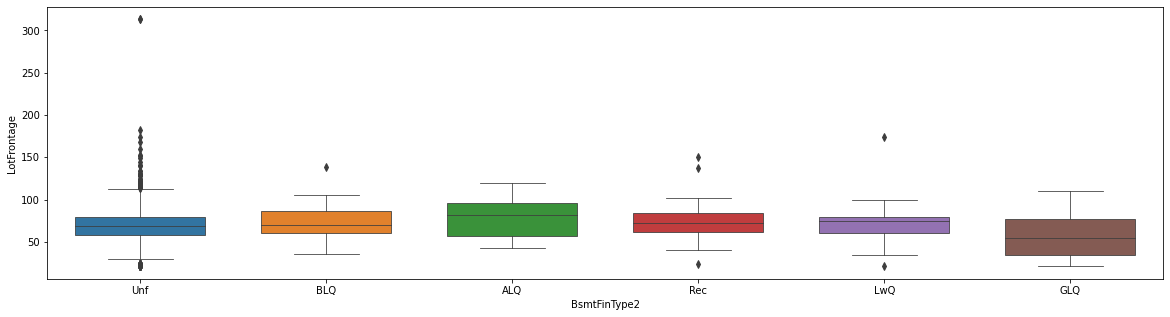

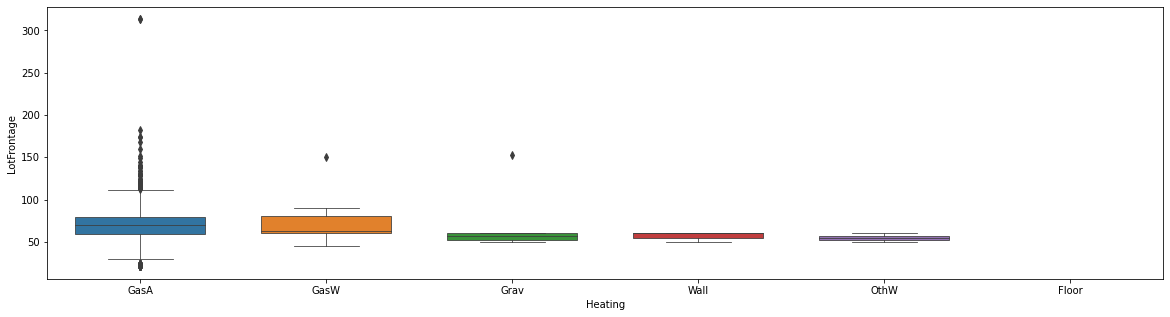

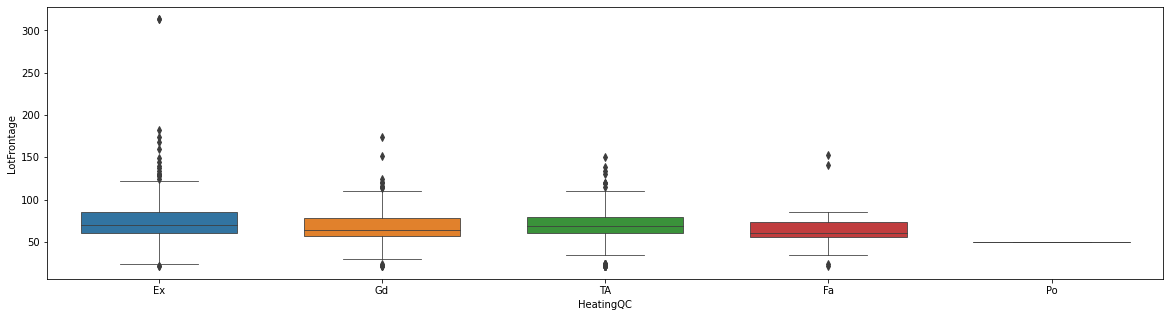

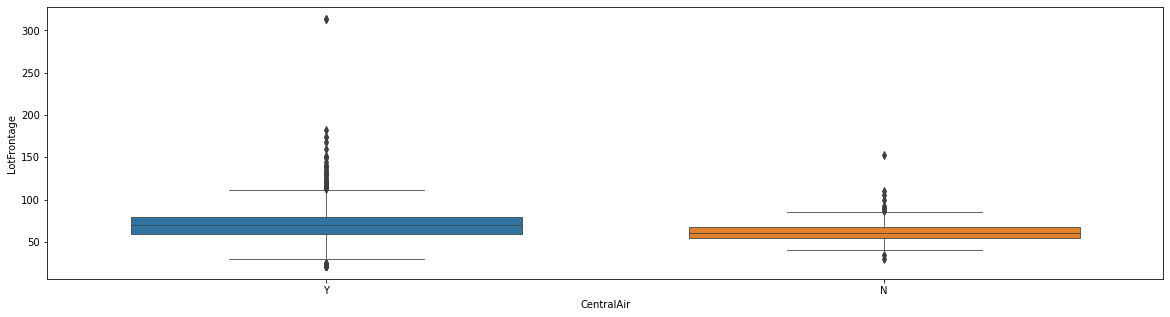

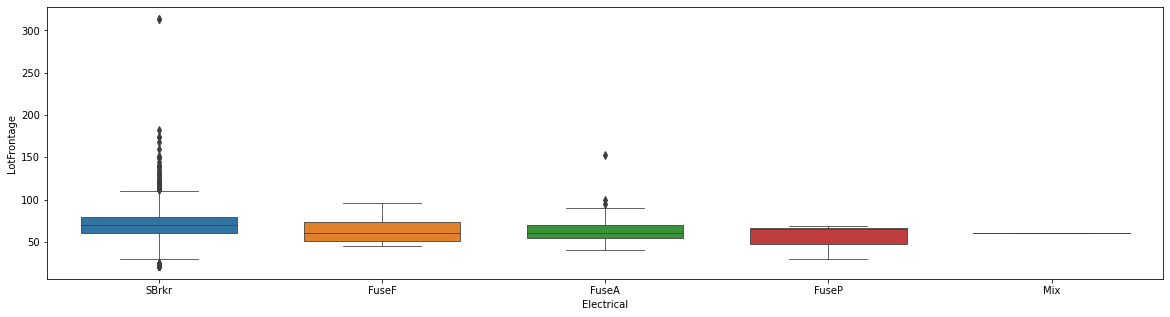

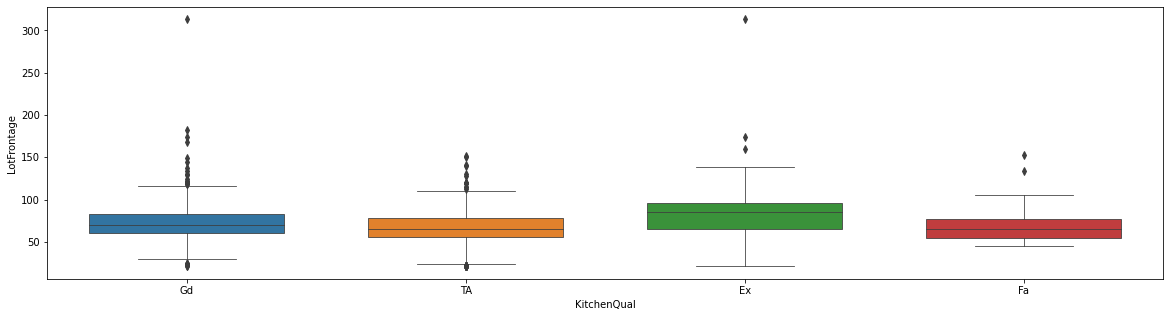

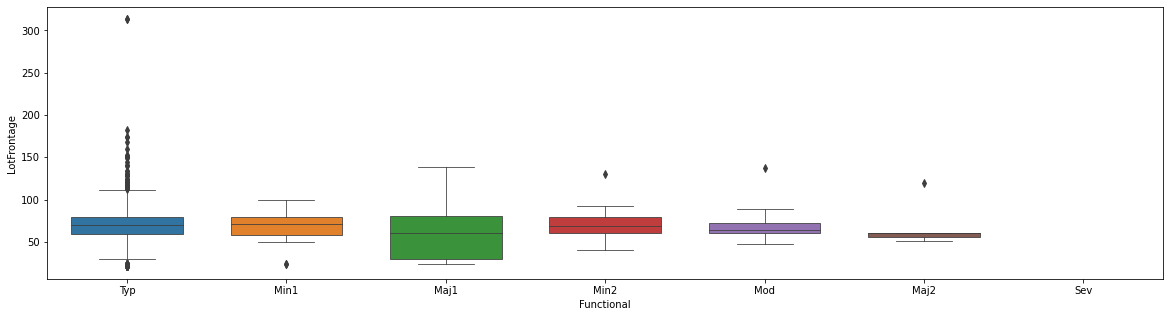

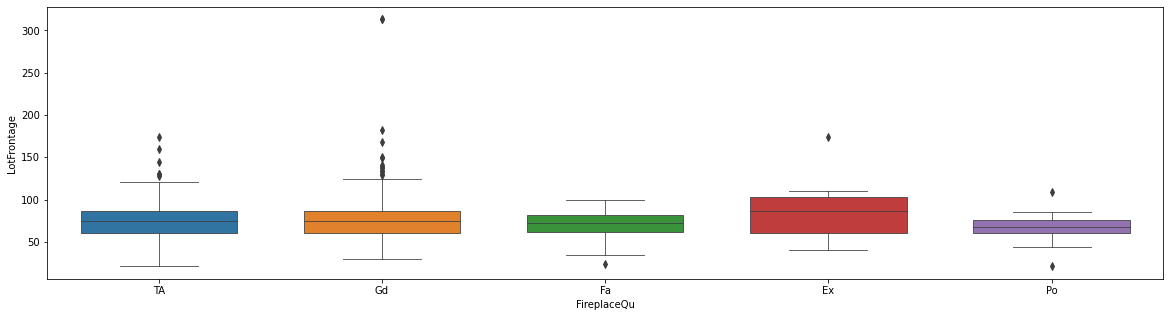

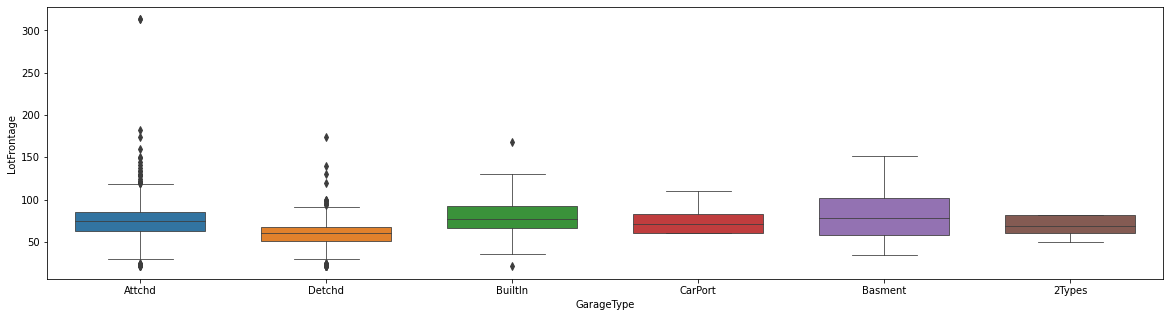

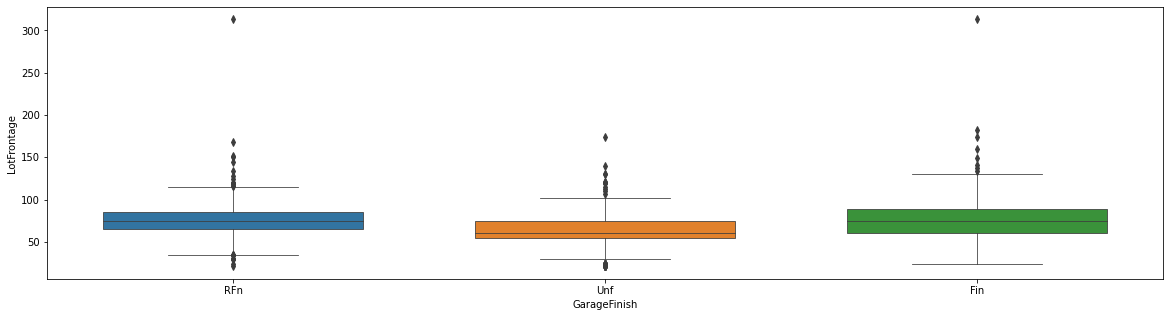

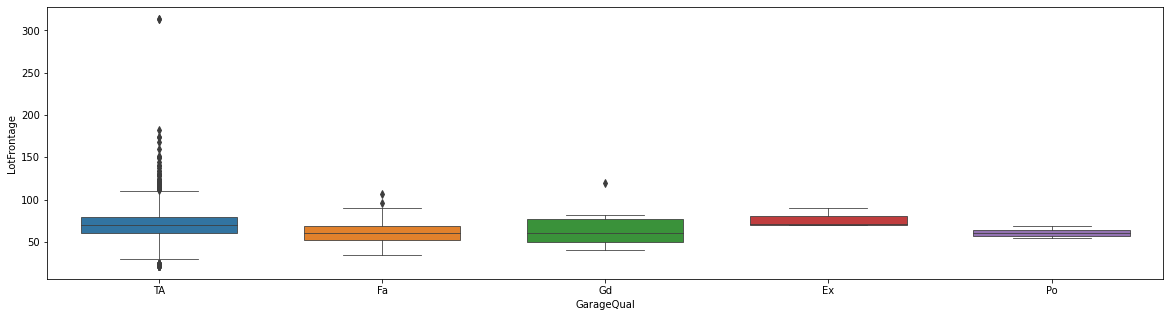

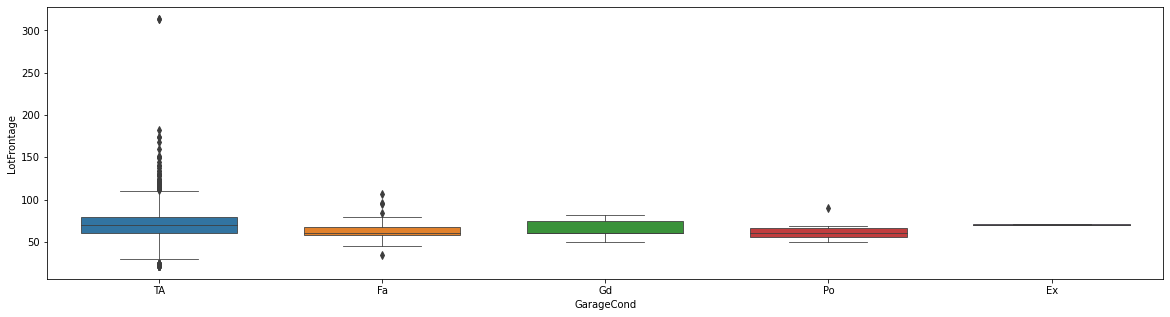

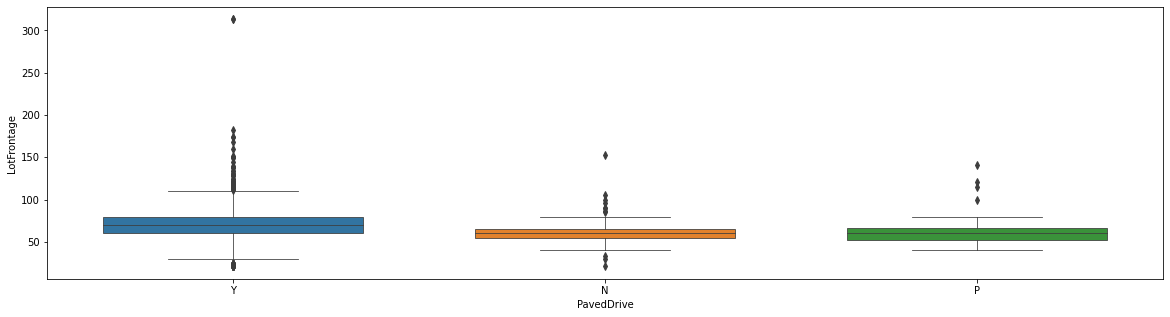

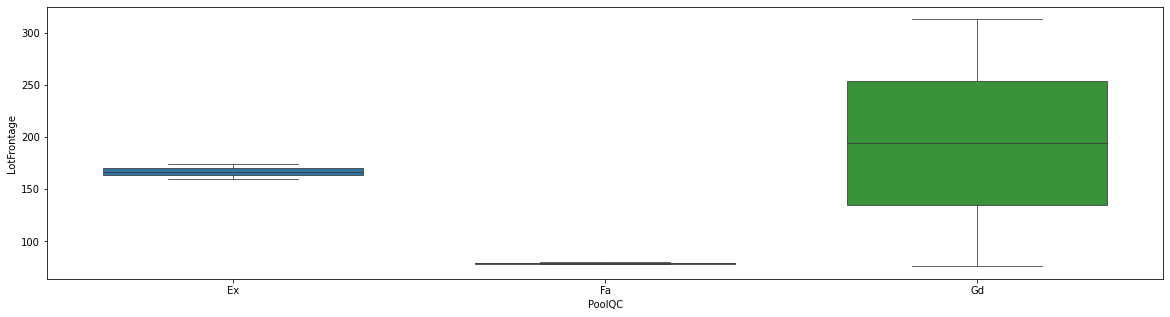

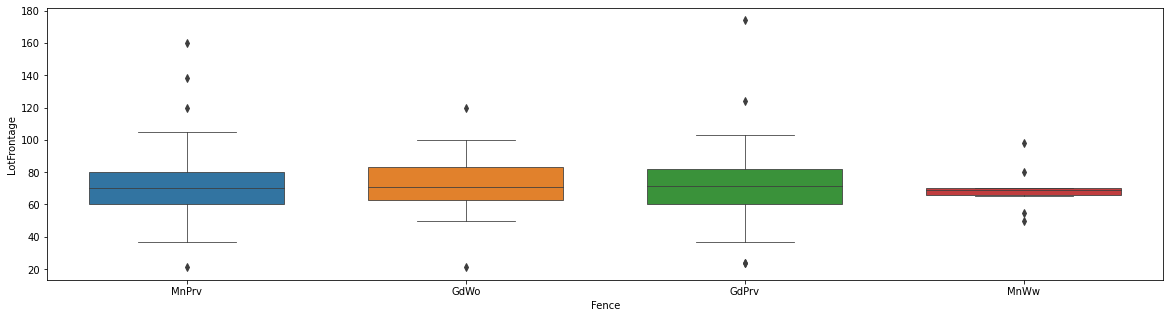

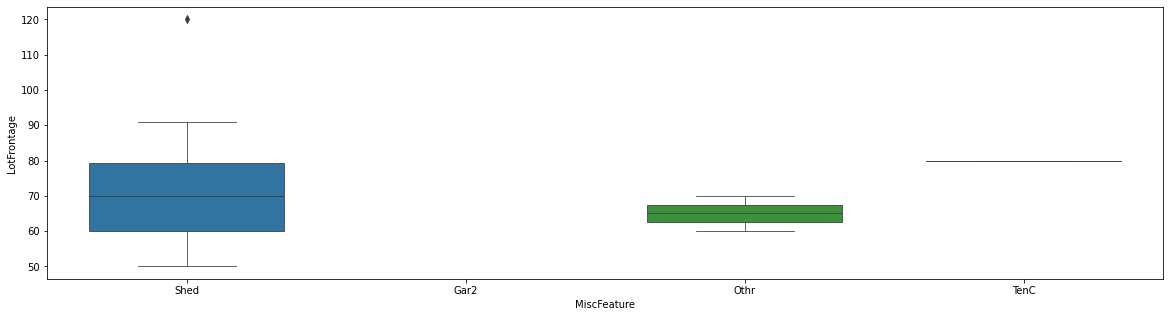

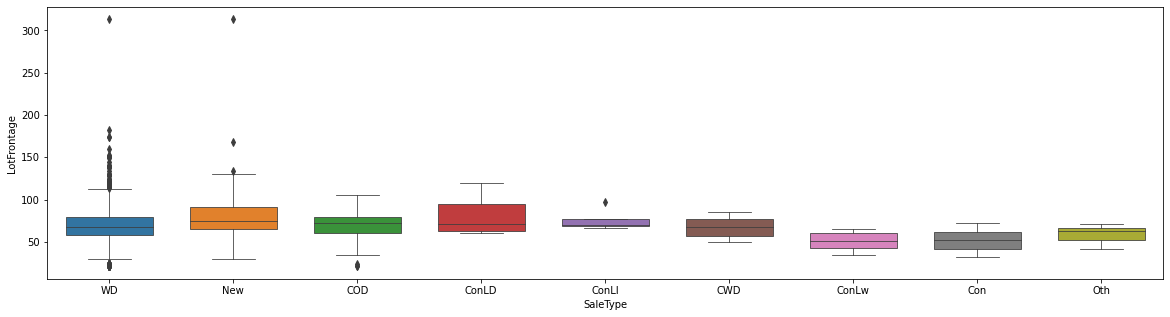

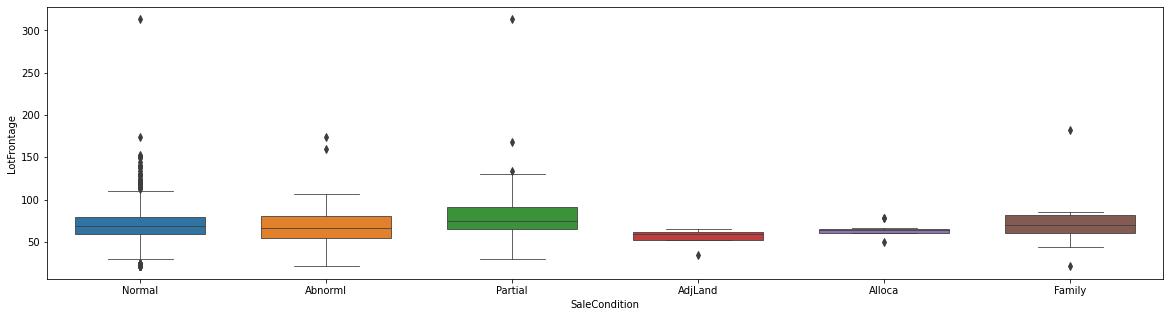

In [ ]:
#Steve
# Thought I'd try to boxplot all the non-numeric attributes
# Getting lots of runtime warnings but it seems to work.
# Although some attributes have tighter boxplots, alot are misleading. 
# For example, does RoofStyle really matter for LotFrontage?
# I'm in favour of Aparna use of Neighborhood. I believe in the end,
# the story needs to make sense. For example, I would think neighborhood,
# LotArea, HousesStyle, MSZoning and YearBuilt would impact the LotFrontage.


def PlotBoxPlot(df, value):
    for items in df:
        if str(df[items]) != str(df[value]):
            plt.subplots(figsize=(20,5))
            sns.boxplot(x=df[items], y=df[value], width=0.7, linewidth=0.8)

colToPlot=house_pricing_data.select_dtypes(exclude=['int64','float64'])
colToPlot['LotFrontage']=house_pricing_data['LotFrontage']
colToPlot.info()

PlotBoxPlot(colToPlot, 'LotFrontage')

In [ ]:
#Sean
#Check if there is null value in GarageYrBlt

display(house_pricing_data['GarageYrBlt'].isnull().value_counts())

#Created a FillNullValue function for GarageYrBlt to fill null values when grouping 
#by two or more attributes because .fillna() function for median value is not working
#when grouping morethan one attribute

median_value = house_pricing_data['GarageYrBlt'].median()
display(median_value)

def FillNullValue(x, col_name, df_group):
  if pd.notnull(x[col_name]):
    return x[col_name]
  elif tuple(x[df_group.index.names].values.tolist())[1] == 'None':
    return median_value
  else:
    return df_group.loc[tuple(x[df_group.index.names].values.tolist())]

False    1379
True       81
Name: GarageYrBlt, dtype: int64

1980.0

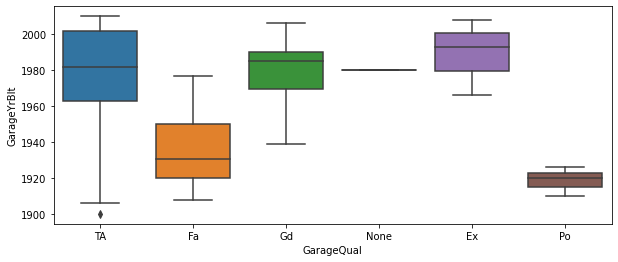

In [ ]:
#Sean
#Boxplot: GarageYrBlt vs. GarageQual

plt.figure(figsize = (10, 4))
sns.boxplot(house_pricing_data['GarageQual'], house_pricing_data['GarageYrBlt'])

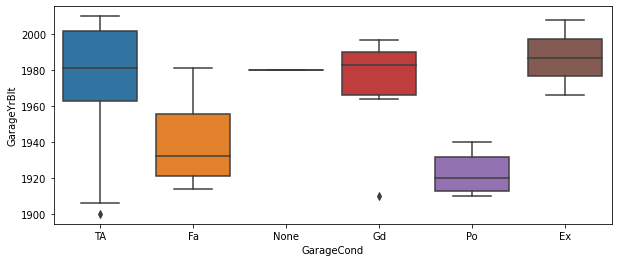

In [ ]:
#Sean
#Boxplot: GarageYrBlt vs. GarageCond

plt.figure(figsize = (10, 4))
sns.boxplot(house_pricing_data['GarageCond'], house_pricing_data['GarageYrBlt'])

In [ ]:
#Sean

#For my perspective, the year of the garage has been built should not have any relatioship
#with GarageType, GarageFinish, GarageCars and GarageArea. It should be reflected by
#GarageQuality and GarageCond since according to the visulization above the quality and
#condition for the garage built from ealier years could have poor quality and condition.

#Grouping GarageQual and GarageCond then find out the median value for corresponding group
display(house_pricing_data['GarageYrBlt'].isnull().value_counts())
GarageYrBlt_group = house_pricing_data.groupby(['GarageQual', 'GarageCond'])['GarageYrBlt'].agg('median')
display(GarageYrBlt_group)
house_pricing_data['GarageYrBlt'] = house_pricing_data.apply(lambda x : FillNullValue(x, 'GarageYrBlt', GarageYrBlt_group), axis = 1)
house_pricing_data['GarageYrBlt'].isnull().values.any()

False    1379
True       81
Name: GarageYrBlt, dtype: int64

GarageQual  GarageCond
Ex          Ex            1987.0
            TA            1993.0
Fa          Fa            1928.5
            Po            1926.5
            TA            1931.0
Gd          Gd            1978.0
            TA            1985.0
None        None             NaN
Po          Po            1920.0
TA          Fa            1941.0
            Gd            1983.0
            TA            1984.0
Name: GarageYrBlt, dtype: float64

False

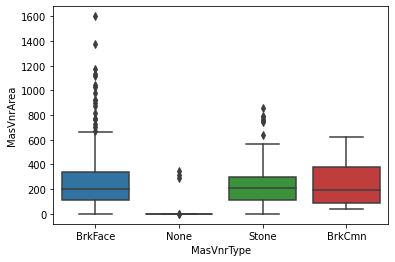

In [ ]:
#Sean
#Boxplot: MasVnrArea vs. MasVnrType

sns.boxplot(house_pricing_data['MasVnrType'], house_pricing_data['MasVnrArea'])

In [ ]:
#Sean

#From the plot above, the MasVnrArea for different type of Masonry Veneer is pretty
#much the same so there should not be any relationship between MasVnrType and MasVnrArea

#Check if any null value in MasVnrArea
display(house_pricing_data['MasVnrArea'].isnull().values.any())
#If we look into the data in MasVnrArea, we can find out the value 0 means there is
#no Masonry Venner since MasVnrType value is None. For the rest of null value
#in MasVnrArea, just simply fill them out using the median

#Get the dataframe with certain condition that there is no 'None' value in MasVnrType
With_MasVnr = house_pricing_data[house_pricing_data['MasVnrType'] != 'None']

#Get the median
with_MasVnr_median = With_MasVnr['MasVnrArea'].median()
display(with_MasVnr_median)

#Fill the null value using median found above

house_pricing_data['MasVnrArea'].fillna(with_MasVnr_median, inplace = True)

#Check null value again

house_pricing_data['MasVnrArea'].isnull().value_counts()


True

202.5

# Creating secondary attributes

In [ ]:
#Aparna

#Adding secondary attributes
house_pricing_data['TotalSF']=house_pricing_data['TotalBsmtSF'] + house_pricing_data['1stFlrSF'] + house_pricing_data['2ndFlrSF']
house_pricing_data['Total_sqr_footage'] = (house_pricing_data['BsmtFinSF1'] + house_pricing_data['BsmtFinSF2'] +
                                 house_pricing_data['1stFlrSF'] + house_pricing_data['2ndFlrSF'])
house_pricing_data['Total_Bathrooms'] = (house_pricing_data['FullBath'] + (0.5 * house_pricing_data['HalfBath']) +
                               house_pricing_data['BsmtFullBath'] + (0.5 * house_pricing_data['BsmtHalfBath']))
house_pricing_data['Total_porch_sf'] = (house_pricing_data['OpenPorchSF'] + house_pricing_data['3SsnPorch'] +
                              house_pricing_data['EnclosedPorch'] + house_pricing_data['ScreenPorch'] +
                              house_pricing_data['WoodDeckSF'])
house_pricing_data['haspool'] = house_pricing_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['has2ndfloor'] = house_pricing_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['hasgarage'] = house_pricing_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['hasbsmt'] = house_pricing_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['hasfireplace'] = house_pricing_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
#Emmanuel
#Generally checking out the new dataset
from scipy.stats import skew
house_pricing_data.skew()

Id                    0.000000
MSSubClass            1.407657
LotFrontage           2.210995
LotArea              12.207688
OverallQual           0.216944
OverallCond           0.693067
YearBuilt            -0.613461
YearRemodAdd         -0.503562
MasVnrArea            2.669084
BsmtFinSF1            1.685503
BsmtFinSF2            4.255261
BsmtUnfSF             0.920268
TotalBsmtSF           1.524255
1stFlrSF              1.376757
2ndFlrSF              0.813030
LowQualFinSF          9.011341
GrLivArea             1.366560
BsmtFullBath          0.596067
BsmtHalfBath          4.103403
FullBath              0.036562
HalfBath              0.675897
BedroomAbvGr          0.211790
KitchenAbvGr          4.488397
TotRmsAbvGrd          0.676341
Fireplaces            0.649565
GarageYrBlt          -0.649415
GarageCars           -0.342549
GarageArea            0.179981
WoodDeckSF            1.541376
OpenPorchSF           2.364342
EnclosedPorch         3.089872
3SsnPorch            10.304342
ScreenPo

In [ ]:
#Emmanuel
#Randomising the fill values for the missing numeric data () based on means
data = [house_pricing_data]

for dataset in data:
    mean = house_pricing_data["MasVnrArea"].mean()
    std = house_pricing_data["MasVnrArea"].std()
    is_null = dataset["MasVnrArea"].isnull().sum()
    # computing random numbers between the mean, std and is_null
    rand_MasnryVarea = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in MasVnrArea column with random values generated
    MasnryV_slice = dataset["MasVnrArea"].copy()
    MasnryV_slice[np.isnan(MasnryV_slice)] = rand_MasnryVarea
    dataset["MasVnrArea"] = MasnryV_slice
    dataset["MasVnrArea"] = house_pricing_data["MasVnrArea"].astype(int)
house_pricing_data["MasVnrArea"].isnull().sum()
house_pricing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
count,1460.000000,1460.000000,1459.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.960247,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.739726,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,2567.048630,1999.808219,2.210616,181.329452,0.004795,0.432192,0.944521,0.974658,0.527397
std,421.610009,42.300571,22.517615,9981.264932,1.382997,1.112799,30.202904,20.645407,180.649220,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,821.714421,773.992942,0.785399,156.656097,0.069100,0.495550,0.228992,0.157217,0.499420
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000,334.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2009.500000,1493.000000,2.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2474.000000,1863.500000,2.000000,164.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3004.000000,2383.500000,2.500000,266.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,20

Machine Learning Models


In [ ]:
#Emmanuel
# Importing np
import numpy as np 

# importing data processing tools
import pandas as pd 

# importing data visualization tools
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Importing algorithms for analyses 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Emmanuel
#Sampling the dependent variable sales prices with a few numerical data.
#Testing the models with only numerical explanatory variables

In [ ]:
#"*****************************************************************************************************************************#
#*********Step 2 Understand explanatory variables(predictor variables) - Numerical Variables or Categorical Variables*********#
#*****************************************************************************************************************************# 

  #Numerical Variables: LotFrontage, LotArea, YearBuilt, YearRemodAdd,MasVnrArea, BsmtFinSF1, BsmtFinSF2,BsmtUnfSF,
                        #TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageYrBlt, GarageArea, WoodDeckSF,
                        #OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
  
  #Categorical Variables: MSSubClass, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, 
                        #Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond,
                        #RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation
                        #BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir,
                        #Electrical, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, KitchenQual,
                        #TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars,
                        #GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

  #In total, there are 79 explanatory variables (excluding ID, and SalePrice). But it is too much work to understand each
    #of them, and also not all of these variables will be selected as model inputs. Hence, based on the correlation level 
    #between target variables and explanatory variables, we only need to understand a few of explanatory variables" from Yezhou
    New_House_Pricing_Data=house_pricing_data['']

In [ ]:
#Emmanuel
#New house pricing data
    New_House_Pricing_Data=house_pricing_data['']

In [ ]:
#Emmanuel
#New Data
New_House_Pricing_Data=house_pricing_data[['SalePrice','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]

In [ ]:
#Emmanuel
New_House_Pricing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  GarageYrBlt    1379 non-null   float64
 15  GarageArea     1460 non-null   int64  
 16  WoodDeckSF     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  Enclosed

In [ ]:
#Emmanuel
#New Data2
New_House_Pricing_Data2=house_pricing_data[['SalePrice','LotFrontage','LotArea','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','MoSold','YrSold']]

In [ ]:
#Emmanuel
New_House_Pricing_Data2.dropna()

,SalePrice,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,MoSold,YrSold
0,208500,65.0,8450,2003,196.0,706,150,856,856,854,1710,2003.0,548,2,2008
1,181500,80.0,9600,1976,0.0,978,284,1262,1262,0,1262,1976.0,460,5,2007
2,223500,68.0,11250,2001,162.0,486,434,920,920,866,1786,2001.0,608,9,2008
3,140000,60.0,9550,1915,0.0,216,540,756,961,756,1717,1998.0,642,2,2006
4,250000,84.0,14260,2000,350.0,655,490,1145,1145,1053,2198,2000.0,836,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,7917,1999,0.0,0,953,953,953,694,1647,1999.0,460,8,2007
1456,210000,85.0,13175,1978,119.0,790,589,1542,2073,0,2073,1978.0,500,2,2010
1457,266500,66.0,9042,1941,0.0,275,877,1152,1188,1152,2340,1941.0,252,5,2010
1458,142125,68.0,9717,1950,0.0,49,0,1078,1078,0,1078,1950.0,240,4,2010


In [ ]:
#Emmanuel
New_House_Pricing_Data.dropna()

,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2,2008
1,181500,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,5,2007
2,223500,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,9,2008
3,140000,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2,2006
4,250000,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,0,1647,1999.0,460,0,40,0,0,0,0,0,8,2007
1456,210000,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1978.0,500,349,0,0,0,0,0,0,2,2010
1457,266500,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,1941.0,252,0,60,0,0,0,0,2500,5,2010
1458,142125,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1950.0,240,366,0,112,0,0,0,0,4,2010


In [ ]:
#Emmanuel
New_House_Pricing_Data2.describe()

,SalePrice,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,70.049958,10516.828082,1971.267808,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1978.506164,472.980137,6.321918,2007.815753
std,79442.502883,24.284752,9981.264932,30.202904,181.066207,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,24.689725,213.804841,2.703626,1.328095
min,34900.000000,21.000000,1300.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,1.000000,2006.000000
25%,129975.000000,59.000000,7553.500000,1954.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1961.000000,334.500000,5.000000,2007.000000
50%,163000.000000,69.000000,9478.500000,1973.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,6.000000,2008.000000
75%,214000.000000,80.000000,11601.500000,2000.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2002.000000,576.000000,8.000000,2009.000000
max,755000.000000,313.000000,215245.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,1418.000000,12.000000,2010.000000


In [ ]:
#Emmanuel
New_House_Pricing_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePrice    1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   YearBuilt    1460 non-null   int64  
 4   MasVnrArea   1452 non-null   float64
 5   BsmtFinSF1   1460 non-null   int64  
 6   BsmtUnfSF    1460 non-null   int64  
 7   TotalBsmtSF  1460 non-null   int64  
 8   1stFlrSF     1460 non-null   int64  
 9   2ndFlrSF     1460 non-null   int64  
 10  GrLivArea    1460 non-null   int64  
 11  GarageYrBlt  1379 non-null   float64
 12  GarageArea   1460 non-null   int64  
 13  MoSold       1460 non-null   int64  
 14  YrSold       1460 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 171.2 KB


In [ ]:

#Emmanuel
#Check if any null value
display(New_House_Pricing_Data2.isnull().values.any())


True

In [ ]:
#Emmanuel
NHPD=New_House_Pricing_Data.dropna()

In [ ]:
#Emmanuel
NHouse_Pricing_data=house_pricing_data[['SalePrice','MasVnrArea','LotFrontage','GarageYrBlt','YrSold']]

In [ ]:
NHPD.head(50)

,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,0,2,2008
1,181500,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,0,5,2007
2,223500,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,0,9,2008
3,140000,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,0,2,2006
4,250000,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,0,12,2008
5,143000,85.0,14115,1993,1995,0.0,732,0,64,796,796,566,0,1362,1993.0,480,40,30,0,320,0,0,700,10,2009
6,307000,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,2004.0,636,255,57,0,0,0,0,0,8,2007
8,129900,51.0,6120,1931,1950,0.0,0,0,952,952,1022,752,0,1774,1931.0,468,90,0,205,0,0,0,0,4,2008
9,118000,50.0,7420,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1939.0,205,0,4,0,0,0,0,0,1,2008
10,129500,70.0,11200,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1965.0,384,0,0,0,0,0,0,0,2,2008


Setting up the different models 


In [ ]:
#Emmanuel
x_house_pricing_data =NHPD.drop("YrSold", axis=1)
y_house_pricing_data =NHPD["SalePrice"]

In [ ]:
#Emmanuel
#Stochastic Gradient Descent Model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_house_pricing_data, y_house_pricing_data)
Y_pred = sgd.predict(x_house_pricing_data)

sgd.score(x_house_pricing_data,y_house_pricing_data)

acc_sgd = round(sgd.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

In [ ]:
#Emmanuel
#Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_house_pricing_data, y_house_pricing_data)

Y_prediction = random_forest.predict(x_house_pricing_data)

random_forest.score(x_house_pricing_data,y_house_pricing_data)
acc_random_forest = round(random_forest.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

In [ ]:
#Emmanuel
#Logistic regression-may only be applicable when dummies are created for the categorical variables
logreg=LogisticRegression(max_iter=1000)
logreg = LogisticRegression()
logreg.fit(x_house_pricing_data, y_house_pricing_data)

Y_pred = logreg.predict(x_house_pricing_data)

acc_log = round(logreg.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Emmanuel
#The naive Bayesian model
gaussian = GaussianNB() 
gaussian.fit(x_house_pricing_data, y_house_pricing_data)  
Y_pred = gaussian.predict(x_house_pricing_data)  
acc_gaussian = round(gaussian.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

In [ ]:
#Emmanuel
# KNN K nearest Neigbor model
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_house_pricing_data, y_house_pricing_data)  
Y_pred = knn.predict(x_house_pricing_data)  
acc_knn = round(knn.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

In [ ]:
#Emmmanuel
#Perception model
perceptron = Perceptron(max_iter=1000)
perceptron.fit(x_house_pricing_data, y_house_pricing_data)

Y_pred = perceptron.predict(x_house_pricing_data)

acc_perceptron = round(perceptron.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

In [ ]:
#Emmanuel
#Linear support Vector Model
Linear_svc=LinearSVC(max_iter=1000)
linear_svc = LinearSVC()
linear_svc.fit(x_house_pricing_data, y_house_pricing_data)

Y_pred = linear_svc.predict(x_house_pricing_data)

acc_linear_svc = round(linear_svc.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Emmanuel
#Statistical Decision Tree Model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_house_pricing_data, y_house_pricing_data)  
Y_pred = decision_tree.predict(x_house_pricing_data) 
acc_decision_tree = round(decision_tree.score(x_house_pricing_data, y_house_pricing_data) * 100, 2)

In [ ]:
#Emmanuel
#Model Selection
results = pd.DataFrame({
    'Model_Results': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model_Results
Score,
100.00,Random Forest
100.00,Naive Bayes
100.00,Decision Tree
47.55,KNN
3.03,Logistic Regression
0.62,Perceptron
0.45,Support Vector Machines
0.18,Stochastic Gradient Decent


In [ ]:
#From the above models, Random Forest, naive Bayseian and Decision Tree Models produce the best fit for predicting factors affecting the housing sales price in Cali

In [ ]:
#Checking for importances of variables in our analyses
importances = pd.DataFrame({'feature':x_house_pricing_data.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)

,importance
feature,
SalePrice,0.121
LotArea,0.065
GrLivArea,0.065
BsmtUnfSF,0.061
1stFlrSF,0.060
GarageArea,0.060
TotalBsmtSF,0.058
LotFrontage,0.056
YearBuilt,0.051
